# **UNSUPERVISED MACHINE LEARNING**

# 7mo Licenciatura en Ciencia de Datos

Aspectos que se deben considerar antes de realizar un cluster.

1. Las filas son observaciones y las columnas deben ser variables. 
2. Dar tratamiento a los valores nulos: eliminar o estimar. 
3. Los datos deben estar estandarizados (es decir, escalados) para que las variables sean comparables: media 0 y desviación estándar 1.

# BASE DE DATOS
**USArrests:** 
Describe la tasa de delitos violentos por estado de EE. UU.

**Descripción:**
Este conjunto de datos contiene estadísticas, en arrestos por cada 100,000 residentes por asalto, asesinato y violación en cada uno de los 50 estados de EE. UU. En 1973. También se da el porcentaje de la población que vive en áreas urbanas.

** CARGA DE INFORMACIÓN**


In [ ]:
data("USArrests") # Load the data set
df <- USArrests # Use df as shorter name
head(df)


Murder Assault UrbanPop Rape
Alabama    13.2   236     58       21.2
Alaska     10.0   263     48       44.5
Arizona     8.1   294     80       31.0
Arkansas    8.8   190     50       19.5
California  9.0   276     91       40.6
Colorado    7.9   204     78       38.7

Observamos 3 tipos de arrestos y la población en cada poblado o región. 

*   Murder -> Asesinato
*   Assault -> Asalto
*   Habitantes -> UrbanPop
*   Rape -> Violación



In [ ]:
summary(df)

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

In [ ]:
sum(is.na(df$Assault))
sum(is.na(df$Murder))
sum(is.na(df$UrbanPop))
sum(is.na(df$Rape))

[1] 0

[1] 0

[1] 0

[1] 0

In [ ]:
df <- na.omit(df)

In [ ]:
## Escalar los datos
df <- scale(df)
head(df, n = 3)

Murder     Assault   UrbanPop   Rape        
Alabama 1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska  0.50786248 1.1068225 -1.2117642  2.484202941
Arizona 0.07163341 1.4788032  0.9989801  1.042878388

[1] "Murder"


[1] -7.663087e-17

[1] 1

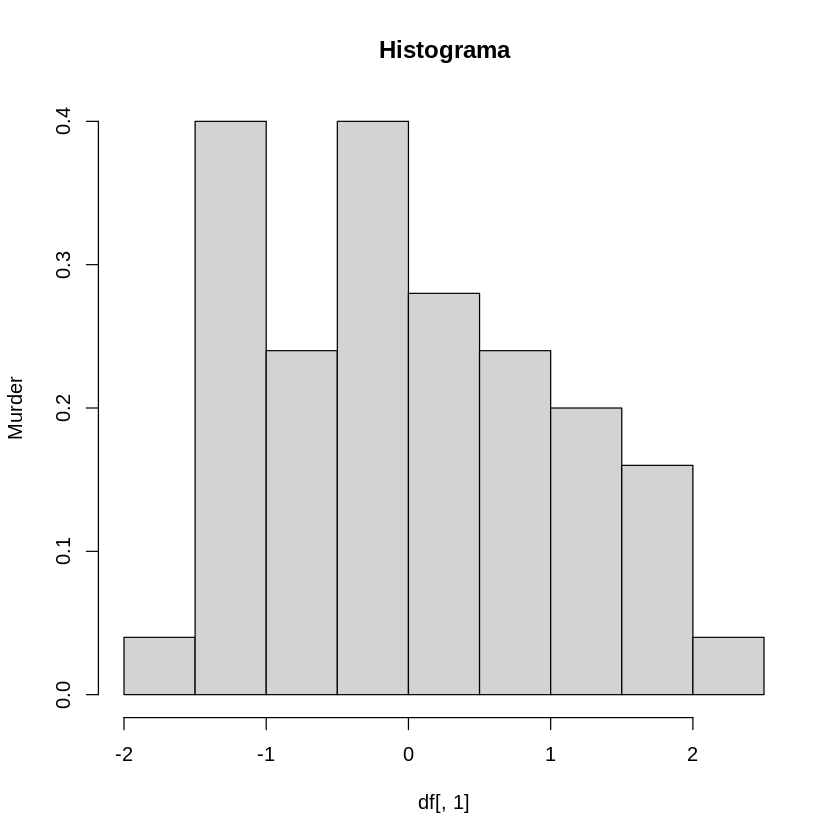

In [ ]:
print("Murder")
mean(df[,1])
var(df[,1])

# Histograma de Asesinato
hist(df[,1], prob = TRUE, main = "Histograma", # Densidad
     ylab = "Murder")

[1] "Assault"


[1] 1.112408e-16

[1] 1

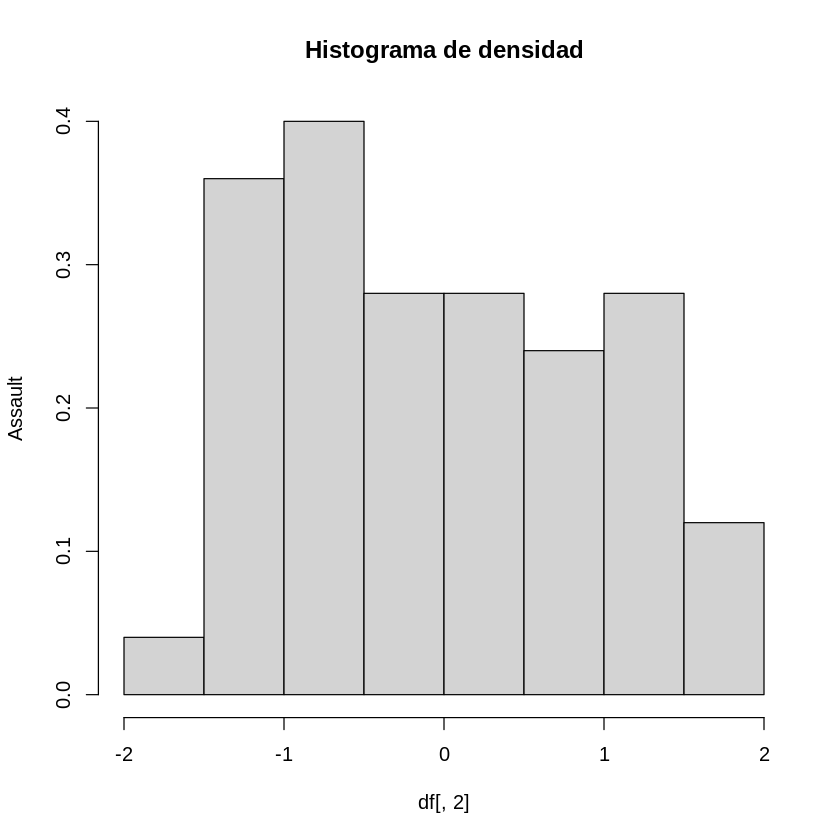

In [ ]:
print("Assault")
mean(df[,2])
var(df[,2])

#Histograma de asalto
hist(df[,2], prob = TRUE, main = "Histograma de densidad", # Densidad
     ylab = "Assault")

[1] "UrbanPop"


[1] -4.332808e-16

[1] 1

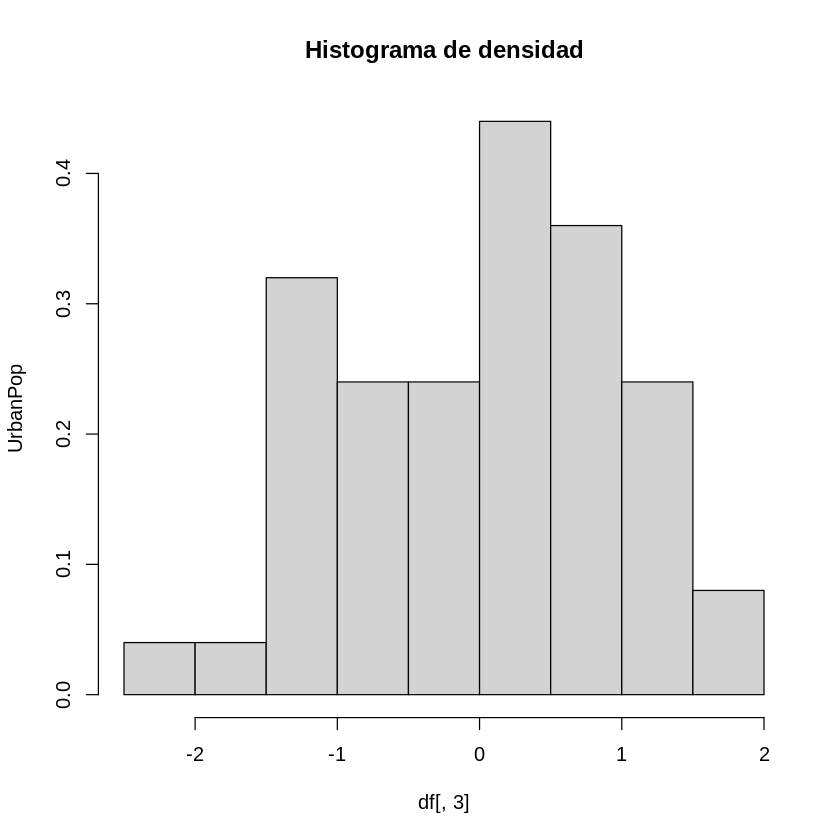

In [ ]:
print("UrbanPop")
mean(df[,3])
var(df[,3])

#Histograma de violación
hist(df[,3], prob = TRUE, main = "Histograma de densidad", # Densidad
     ylab = "UrbanPop")

[1] "Violation"


[1] 8.942391e-17

[1] 1

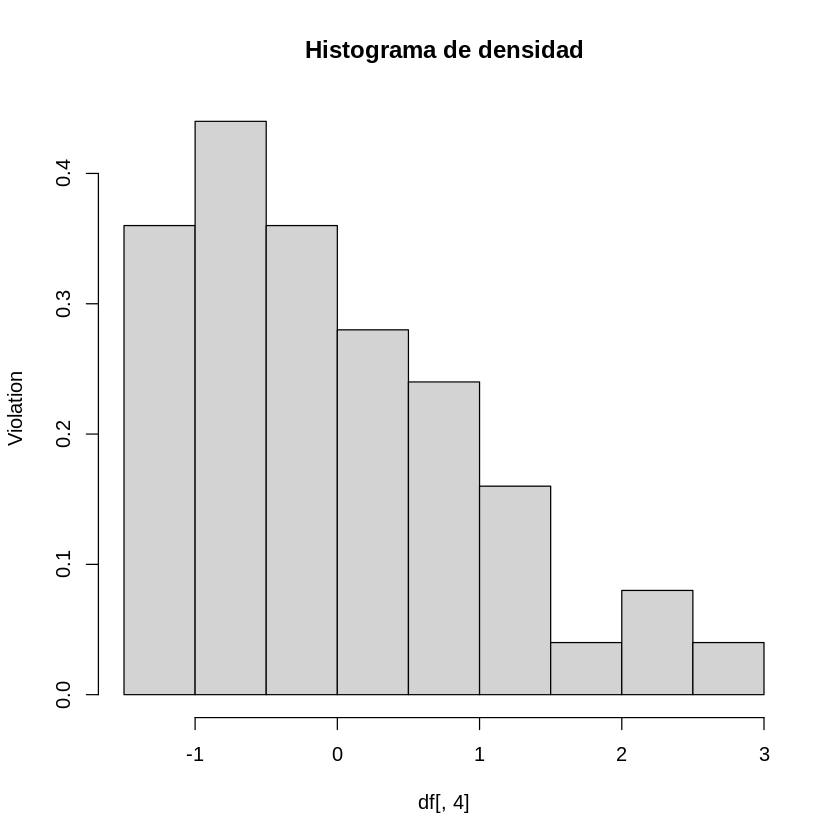

In [ ]:
print("Violation")
mean(df[,4])
var(df[,3])

#Histograma de violación
hist(df[,4], prob = TRUE, main = "Histograma de densidad", # Densidad
     ylab = "Violation")

## Librerías especializadas 

In [ ]:
install.packages(c("cluster", "factoextra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
#install.packages("cluster")
#install.packages("devtools")
#devtools::install_github("kassambara/factoextra")

In [ ]:
library("ggplot2")
library("factoextra")
library("cluster")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### Métodos para medir distancias


*   Distancia euclideana
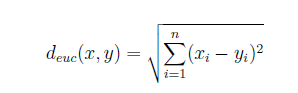


*   Distancia de Manhattan (valores absolutos)
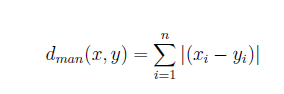
*   Distancia de la correlación de Pearson (1- corr)
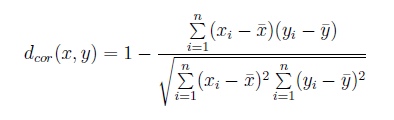
*   Distnacia de Eisen cosine
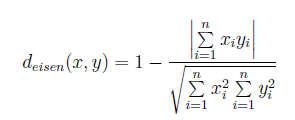
*   Distancia de correlación de Sepearman
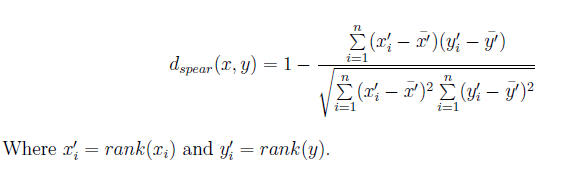
*   Distancia de correlación de Kendall
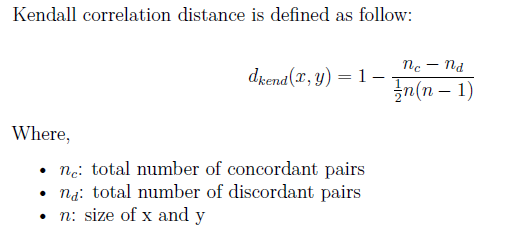






### Selección de la muestra

Emplearemos solo un subconjunto de los datos tomando 15 filas aleatorias entre las 50 filas del conjunto de datos. Esto se hace usando la función *sample ()*. A continuación, estandarizamos los datos usando la función *scale ()*:

In [ ]:
df

Murder      Assault     UrbanPop    Rape        
Alabama         1.24256408  0.78283935 -0.52090661 -0.003416473
Alaska          0.50786248  1.10682252 -1.21176419  2.484202941
Arizona         0.07163341  1.47880321  0.99898006  1.042878388
Arkansas        0.23234938  0.23086801 -1.07359268 -0.184916602
California      0.27826823  1.26281442  1.75892340  2.067820292
Colorado        0.02571456  0.39885929  0.86080854  1.864967207
Connecticut    -1.03041900 -0.72908214  0.79172279 -1.081740768
Delaware       -0.43347395  0.80683810  0.44629400 -0.579946294
Florida         1.74767144  1.97077766  0.99898006  1.138966691
Georgia         2.20685994  0.48285493 -0.38273510  0.487701523
Hawaii         -0.57123050 -1.49704226  1.20623733 -0.110181255
Idaho          -1.19113497 -0.60908837 -0.79724965 -0.750769945
Illinois        0.59970018  0.93883125  1.20623733  0.295524916
Indiana        -0.13500142 -0.69308401 -0.03730631 -0.024769429
Iowa           -1.28297267 -1.37704849 -0.58999237 -1.060387812
Kansas         -0.41051452 -0.66908525  0.03177945 -0.345063775
Kentucky        0.43898421 -0.74108152 -0.93542116 -0.526563903
Louisiana       1.74767144  0.93883125  0.03177945  0.103348309
Maine          -1.30593210 -1.05306531 -1.00450692 -1.434064548
Maryland        0.80633501  1.55079947  0.10086521  0.701231086
Massachusetts  -0.77786532 -0.26110644  1.34440885 -0.526563903
Michigan        0.99001041  1.01082751  0.58446551  1.480613993
Minnesota      -1.16817555 -1.18505846  0.03177945 -0.676034598
Mississippi     1.90838741  1.05882502 -1.48810723 -0.441152078
Missouri        0.27826823  0.08687549  0.30812248  0.743936999
Montana        -0.41051452 -0.74108152 -0.86633540 -0.515887425
Nebraska       -0.80082475 -0.82507715 -0.24456358 -0.505210947
Nevada          1.01296983  0.97482938  1.06806582  2.644350114
New Hampshire  -1.30593210 -1.36504911 -0.65907813 -1.252564419
New Jersey     -0.08908257 -0.14111267  1.62075188 -0.259651949
New Mexico      0.82929443  1.37080881  0.30812248  1.160319648
New York        0.76041616  0.99882813  1.41349461  0.519730957
North Carolina  1.19664523  1.99477641 -1.41902147 -0.547916860
North Dakota   -1.60440462 -1.50904164 -1.48810723 -1.487446939
Ohio           -0.11204199 -0.60908837  0.65355127  0.017936483
Oklahoma       -0.27275797 -0.23710769  0.16995096 -0.131534211
Oregon         -0.66306820 -0.14111267  0.10086521  0.861378259
Pennsylvania   -0.34163624 -0.77707965  0.44629400 -0.676034598
Rhode Island   -1.00745957  0.03887798  1.48258036 -1.380682157
South Carolina  1.51807718  1.29881255 -1.21176419  0.135377743
South Dakota   -0.91562187 -1.01706718 -1.41902147 -0.900240639
Tennessee       1.24256408  0.20686926 -0.45182086  0.605142783
Texas           1.12776696  0.36286116  0.99898006  0.455672088
Utah           -1.05337842 -0.60908837  0.99898006  0.178083656
Vermont        -1.28297267 -1.47304350 -2.31713632 -1.071064290
Virginia        0.16347111 -0.17711080 -0.17547783 -0.056798864
Washington     -0.86970302 -0.30910395  0.51537975  0.530407436
West Virginia  -0.47939280 -1.07706407 -1.83353601 -1.273917376
Wisconsin      -1.19113497 -1.41304662  0.03177945 -1.113770203
Wyoming        -0.22683912 -0.11711392 -0.38273510 -0.601299251

In [ ]:
# Subset of the data
set.seed(123)
ss <- sample(1:50, 15) # Take 15 random rows
df <- USArrests[ss, ] # Subset the 15 rows
df.scaled <- scale(df) # Standardize the variables

Hay muchas funciones R para calcular distancias entre pares de observaciones:

1. Función base dist () R [stats]: Acepta sólo datos numéricos como entrada.


2. Función get_dist () [factoextra]: Acepta sólo datos numéricos como entrada.
En comparación con la función dist () estándar, admite distancia basada en correlación
medidas que incluyen los métodos "pearson", "kendall" y "spearman".
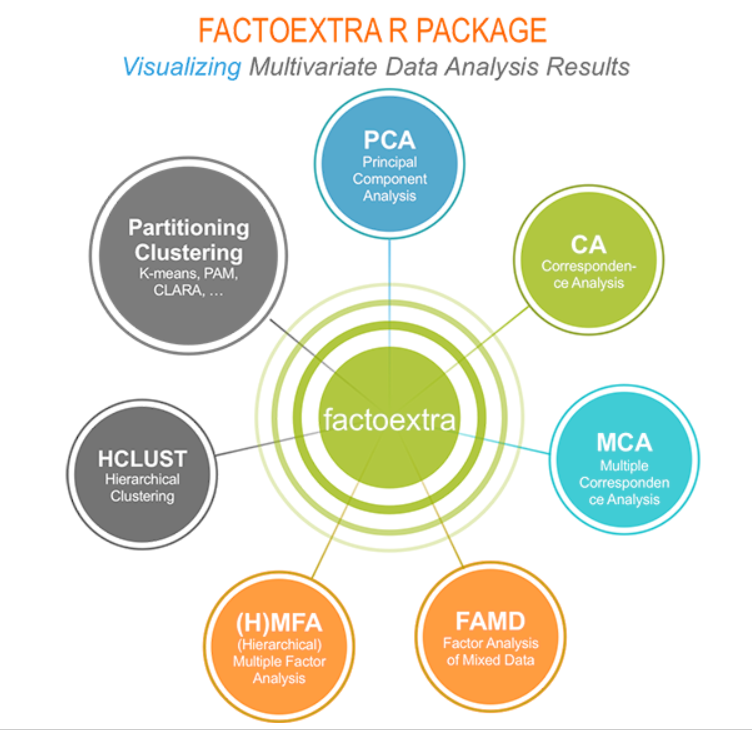
3. función daisy () [cluster]: capaz de manejar otros tipos de variables (por ejemplo, nominal, ordinal, (a) binario simétrico). En ese caso, el coeficiente de Gower será
se utilizará automáticamente como métrica. Es una de las medidas más populares de proximidad para tipos de datos mixtos. Para obtener más detalles, lea la documentación de R de
la función daisy .

### Calculamos la distancia euclidiana

In [ ]:
dist.eucl <- dist(df.scaled, method = "euclidean")

Para facilitar la visualización de la información de distancia generada por la función dist (), puede reformatear el vector de distancia en una matriz usando la función as.matrix ().


In [ ]:
round(as.matrix(dist.eucl)[1:3, 1:3], 1)

New Mexico Iowa Indiana
New Mexico 0.0        4.1  2.5    
Iowa       4.1        0.0  1.8    
Indiana    2.5        1.8  0.0

En esta matriz, el valor representa la distancia entre objetos. Los valores en el diagonal de la matriz representan la distancia entre los objetos y ellos mismos (que son cero).



### Calculamos la distancia basada en correlación

In [ ]:
dist.cor <- get_dist(df.scaled, method = "pearson")
# Display a subset
round(as.matrix(dist.cor)[1:3, 1:3], 1)

New Mexico Iowa Indiana
New Mexico 0.0        1.7  2.0    
Iowa       1.7        0.0  0.3    
Indiana    2.0        0.3  0.0

### Computando distancias cuando se tienen diferentes datos

La distancia de Gower se puede utilizar para medir qué tan diferentes son dos registros. Los registros pueden contener una combinación de datos lógicos, categóricos, numéricos o de texto. La distancia es siempre un número entre 0 (idéntico) y 1 (máximamente diferente). 

Las métricas utilizadas para cada tipo de datos se describen a continuación:
 * cuantitativo (intervalo): distancia de Manhattan normalizada por rango
 * ordinal: la variable se clasifica primero, luego la distancia de Manhattan se usa con un ajuste especial para los empates
 * nominal: las variables de k categorías se convierten primero en k columnas binarias y luego se usa el coeficiente de Dice 
 Ref: https://es.wikipedia.org/wiki/Coeficiente_de_Sorensen-Dice

***********************************

In [ ]:
# Load data
data(flower)
head(flower, 3)

V1 V2 V3 V4 V5 V6 V7  V8
1 0  1  1  4  3  15  25 15
2 1  0  0  2  1  3  150 50
3 0  1  0  3  3  1  150 50

A data frame with 18 observations on 8 variables:

[ , "V1"]	factor	winters
[ , "V2"]	factor	shadow
[ , "V3"]	factor	tubers
[ , "V4"]	factor	color
[ , "V5"]	ordered	soil
[ , "V6"]	ordered	preference
[ , "V7"]	numeric	height
[ , "V8"]	numeric	distance
V1
winters, is binary and indicates whether the plant may be left in the garden when it freezes.

V2
shadow, is binary and shows whether the plant needs to stand in the shadow.

V3
tubers, is asymmetric binary and distinguishes between plants with tubers and plants that grow in any other way.

V4
color, is nominal and specifies the flower's color (1 = white, 2 = yellow, 3 = pink, 4 = red, 5 = blue).

V5
soil, is ordinal and indicates whether the plant grows in dry (1), normal (2), or wet (3) soil.

V6
preference, is ordinal and gives someone's preference ranking going from 1 to 18.

V7
height, is interval scaled, the plant's height in centimeters.

V8
distance, is interval scaled, the distance in centimeters that should be left between the plants.

In [ ]:
# Data structure
str(flower)

'data.frame':	18 obs. of  8 variables:
 $ V1: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ V2: Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ V3: Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 1 1 ...
 $ V4: Factor w/ 5 levels "1","2","3","4",..: 4 2 3 4 5 4 4 2 3 5 ...
 $ V5: Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 2 2 3 3 2 1 2 ...
 $ V6: Ord.factor w/ 18 levels "1"<"2"<"3"<"4"<..: 15 3 1 16 2 12 13 7 4 14 ...
 $ V7: num  25 150 150 125 20 50 40 100 25 100 ...
 $ V8: num  15 50 50 50 15 40 20 15 15 60 ...


In [ ]:
# Distance matrix
dd <- daisy(flower)
round(as.matrix(dd)[1:3, 1:3], 2)

1    2    3   
1 0.00 0.89 0.53
2 0.89 0.00 0.51
3 0.53 0.51 0.00

**************************

### Visualización de las matrices de distancia

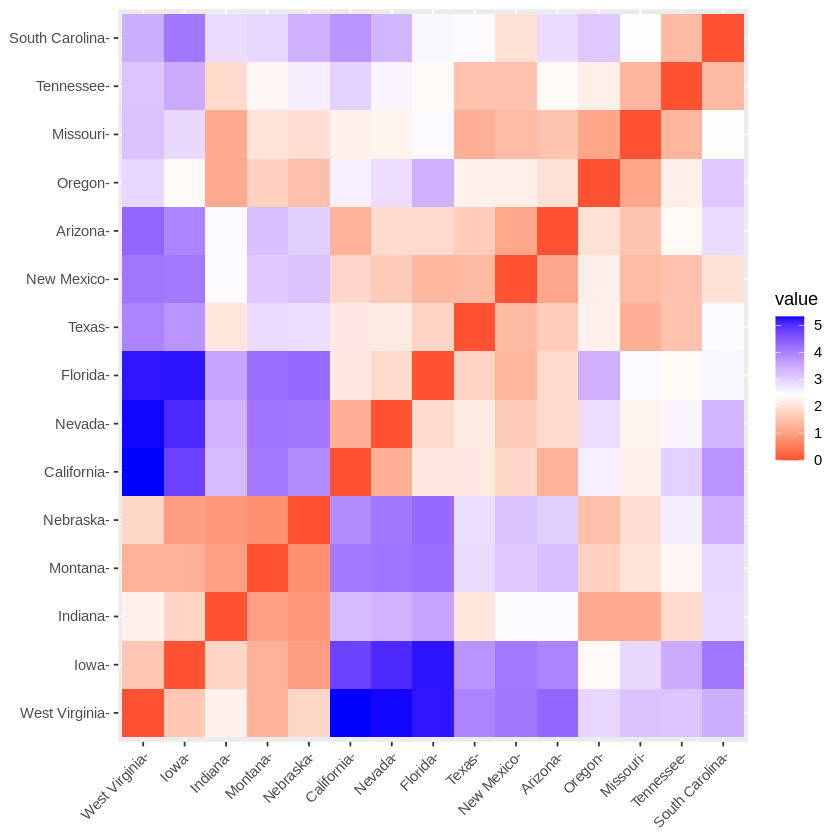

In [ ]:
fviz_dist(dist.eucl)
#Rojo, la distancia es 0
#Azul, la distancia es 1

### Agrupación en clústeres de particiones
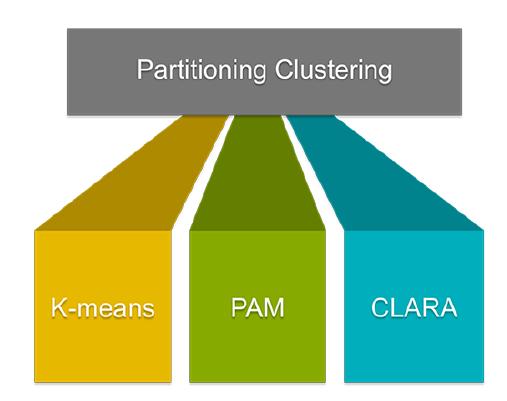


• **Agrupación de K-medias (MacQueen, 1967)**, en la que, cada agrupación está representada
por el centro o por medio de los puntos de datos pertenecientes al clúster. Las K-medias
El método es sensible a puntos de datos anómalos y valores atípicos.

• **Agrupación de K-medoides o PAM (Partitioning Around Medoids, Kaufman & Rousseeuw, 1990)**, en el que, cada grupo está representado por uno de los objetos en
el racimo. PAM es menos sensible a valores atípicos en comparación con k-medias.

• **Algoritmo CLARA (Clustering Large Applications)**, que es una extensión de
PAM adaptado para grandes conjuntos de datos.

## K-Means Clustering

1. Especifique la cantidad de clústeres ($K$) que se crearán (por el analista).

2. Seleccionar aleatoriamente $k$ objetos del conjunto de datos como centros o medias del conglomerado inicial
3. Asigna cada observación a su centroide más cercano, basado en el Euclidean distancia entre el objeto y el centroide
4. Para cada uno de los $k$ conglomerados, actualice el centroide del conglomerado calculando el nuevo
valores medios de todos los puntos de datos del conglomerado. El centoide de un grupo $K_{th}$ es un vector de longitud p que contiene las medias de todas las variables para las observaciones en el $k$-ésimo grupo; p es el número de variables.
5. Minimice iterativamente el total dentro de la suma del cuadrado. Es decir, repita los pasos 3
y 4 hasta que las asignaciones de clústeres dejen de cambiar o el número máximo de se alcanza iteraciones. De forma predeterminada, el software R usa 10 como valor predeterminado
para el número máximo de iteraciones.

## Función para aplicar K-MEANS

kmeans(x, centers, iter.max = 10, nstart = 1)

• *x*: matriz numérica, marco de datos numéricos o un vector numérico.

• *centros*: los valores posibles son el número de grupos (k) o un conjunto de grupos iniciales (distintos) centros de clúster. Si es un número, un conjunto aleatorio de filas (distintas) en x se elige como los centros iniciales.

• *iter.max*: el número máximo de iteraciones permitidas. El valor predeterminado es 10.

• *nstart*: el número de particiones iniciales aleatorias cuando los centros son un número.

A menudo se recomienda probar nstart> 1.
Para crear un hermoso gráfico de los clústeres generados con la función *kmeans ()*, utilice el paquete factoextra.

• Instalación del paquete factoextra

## Estimando el número óptimo de número de clusters

La ubicación de una curva (rodilla) en la trama es generalmente
considerado como un indicador del número apropiado de conglomerados.

La función R *fviz_nbclust ()* [en el paquete factoextra] proporciona una solución conveniente para estimar el número óptimo de conglomerados.

fviz_nbclust (): determina y visualiza el número óptimo de conglomerados usando diferentes métodos: dentro de los conglomerados, sumas de cuadrados, silueta promedio y estadísticas de brechas.

In [ ]:
data("USArrests")
df <- scale(USArrests)
head(df, n = 3)

Murder     Assault   UrbanPop   Rape        
Alabama 1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska  0.50786248 1.1068225 -1.2117642  2.484202941
Arizona 0.07163341 1.4788032  0.9989801  1.042878388

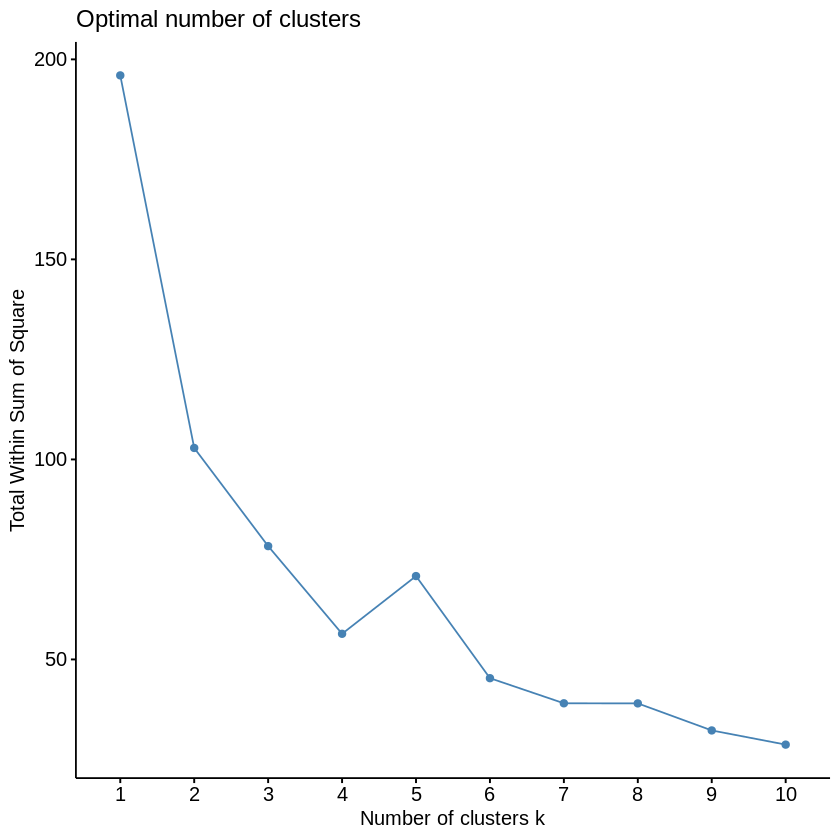

In [ ]:
fviz_nbclust(df, kmeans, method = "wss") 
# podemos cambiar "wss" (for total within sum of square)

In [ ]:
# Compute k-means with k = 4--
set.seed(123)
km.res <- kmeans(df, 4, nstart = 25)

In [ ]:
# Print the results
print(km.res)

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

La salida impresa muestra:

• las medias o centros del conglomerado: una matriz, cuyas filas son el número del conglomerado (1 a 4) y las columnas son variables

• el vector de agrupamiento: un vector de números enteros (de 1: k) que indica el grupo a que se asigna a cada punto


Es posible calcular la media de cada variable por conglomerados utilizando los datos originales:

In [ ]:
aggregate(USArrests, by=list(cluster=km.res$cluster), mean)

cluster Murder   Assault   UrbanPop Rape    
1 1       13.93750 243.62500 53.75000 21.41250
2 2        3.60000  78.53846 52.07692 12.17692
3 3        5.65625 138.87500 73.87500 18.78125
4 4       10.81538 257.38462 76.00000 33.19231

Si desea agregar las clasificaciones de puntos a los datos originales, use esto:

In [ ]:
dd <- cbind(USArrests, cluster = km.res$cluster)
head(dd)


Murder Assault UrbanPop Rape cluster
Alabama    13.2   236     58       21.2 1      
Alaska     10.0   263     48       44.5 4      
Arizona     8.1   294     80       31.0 4      
Arkansas    8.8   190     50       19.5 1      
California  9.0   276     91       40.6 4      
Colorado    7.9   204     78       38.7 4

Accediendo a los resultados de la función kmeans ()
La función kmeans () devuelve una lista de componentes, que incluyen:

• cluster: un vector de números enteros (de 1: k) que indica el cluster al que cada se asigna el punto

• centros: una matriz de centros de conglomerados (medias de conglomerados)

• totss: La suma total de cuadrados (TSS), es decir, q (xi ≠ ¯x) 2. TSS mide el total varianza en los datos.

• withinss: Vector de suma de cuadrados dentro del conglomerado, un componente por conglomerado

• tot.withinss: suma total de cuadrados dentro del conglomerado, es decir, suma (dentro de)

• between: La suma de cuadrados entre grupos, es decir, totss ≠ tot.withinss

• tamaño: el número de observaciones en cada grupo
Se puede acceder a estos componentes de la siguiente manera:

In [ ]:
km.res$cluster
#Número de conglomerado para cada una de las observaciones

Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              4              2              1              4 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             2              2              4              2              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             4              4              1              2              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             2              1              4              3              2 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              2              2              3

In [ ]:
head(km.res$cluster, 4)

Alabama   Alaska  Arizona Arkansas 
       1        4        4        1

In [ ]:
# Cluster size
km.res$size

[1]  8 13 16 13

In [ ]:
# Cluster means
km.res$centers

Murder     Assault    UrbanPop   Rape       
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

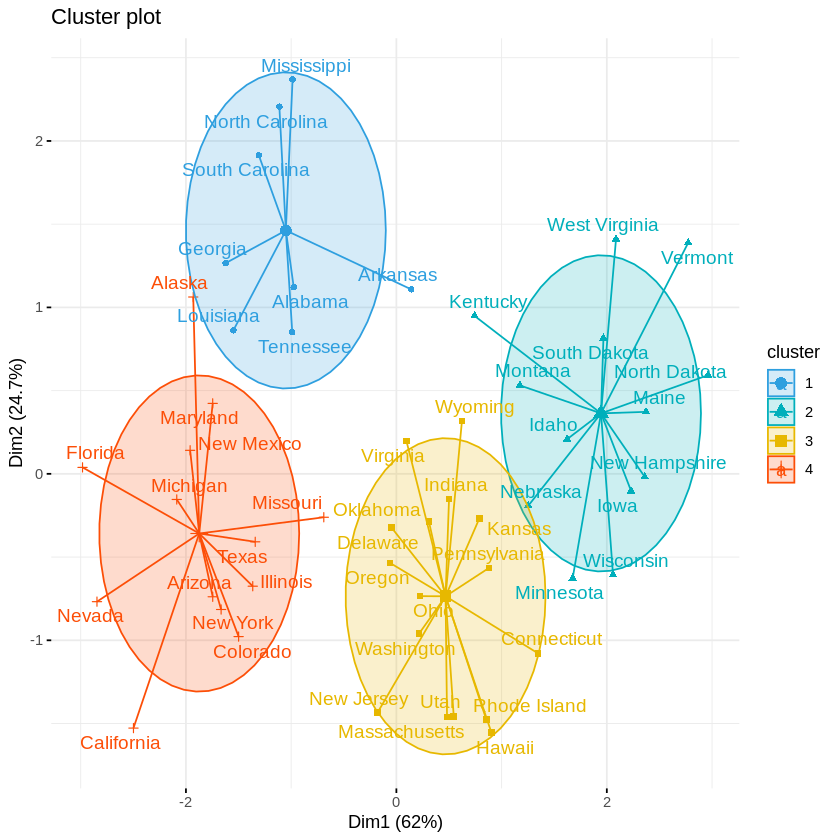

In [ ]:
fviz_cluster(km.res, data = df,
palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
ellipse.type = "euclid", # Concentration ellipse
star.plot = TRUE, # Add segments from centroids to items
repel = TRUE, # Avoid label overplotting (slow)
ggtheme = theme_minimal()
)

In [ ]:
install.packages('amap')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#install.packages('amap')
#library(amap)
#set.seed(123)
#km.res <- Kmeans(df, 2, iter.max = 10, nstart = 25,
        # method = "pearson")
#print(km.res)

In [ ]:
data("USArrests") # Load the data set
df <- scale(USArrests) # Scale the data
head(df, n = 3) # View the firt 3 rows of the data

Murder     Assault   UrbanPop   Rape        
Alabama 1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska  0.50786248 1.1068225 -1.2117642  2.484202941
Arizona 0.07163341 1.4788032  0.9989801  1.042878388

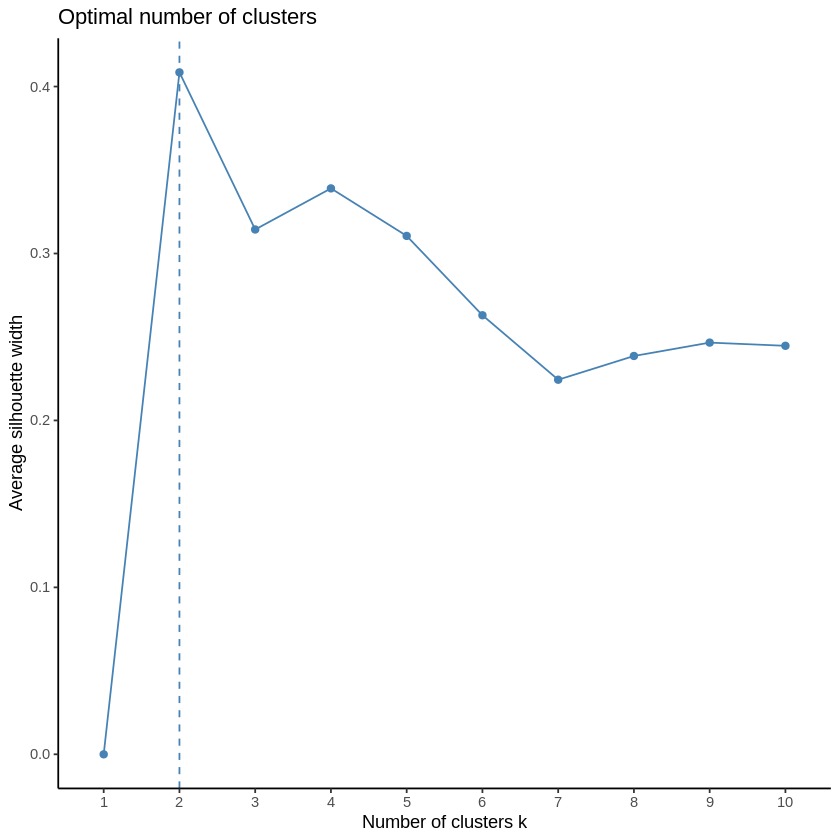

In [ ]:
library(cluster)
library(factoextra)
fviz_nbclust(df, pam, method = "silhouette")+
theme_classic()

In [ ]:
pam.res <- pam(df, 2)
print(pam.res)

Medoids:
           ID     Murder    Assault   UrbanPop       Rape
New Mexico 31  0.8292944  1.3708088  0.3081225  1.1603196
Nebraska   27 -0.8008247 -0.8250772 -0.2445636 -0.5052109
Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana       Nebraska         

In [ ]:
dd <- cbind(USArrests, cluster = pam.res$cluster)
head(dd, n = 3)

Murder Assault UrbanPop Rape cluster
Alabama 13.2   236     58       21.2 1      
Alaska  10.0   263     48       44.5 1      
Arizona  8.1   294     80       31.0 1

In [ ]:
# Cluster medoids: New Mexico, Nebraska
pam.res$medoids

Murder     Assault    UrbanPop   Rape      
New Mexico  0.8292944  1.3708088  0.3081225  1.1603196
Nebraska   -0.8008247 -0.8250772 -0.2445636 -0.5052109

In [ ]:
# Cluster numbers
head(pam.res$clustering)

Alabama     Alaska    Arizona   Arkansas California   Colorado 
         1          1          1          2          1          1

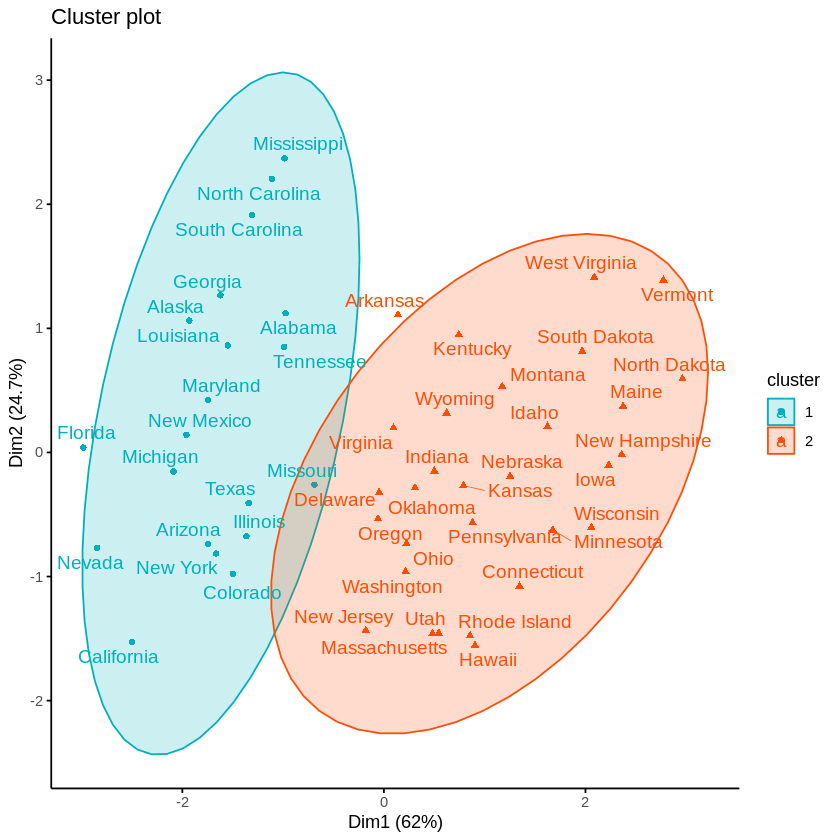

In [ ]:
fviz_cluster(pam.res,
palette = c("#00AFBB", "#FC4E07"), # color palette
ellipse.type = "t", # Concentration ellipse
repel = TRUE, # Avoid label overplotting (slow)
ggtheme = theme_classic()
)

In [ ]:
set.seed(1234)
# Generate 500 objects, divided into 2 clusters.
df <- rbind(cbind(rnorm(200,0,8), rnorm(200,0,8)),
cbind(rnorm(300,50,8), rnorm(300,50,8)))
# Specify column and row names
colnames(df) <- c("x", "y")

In [ ]:
rownames(df) <- paste0("S", 1:nrow(df))
# Previewing the data
head(df, nrow = 6)

x          y       
S1  -9.656526 3.881815
S2   2.219434 5.574150
S3   8.675529 1.484111
S4 -18.765582 5.605868
S5   3.432998 2.493448
S6   4.048447 6.083699

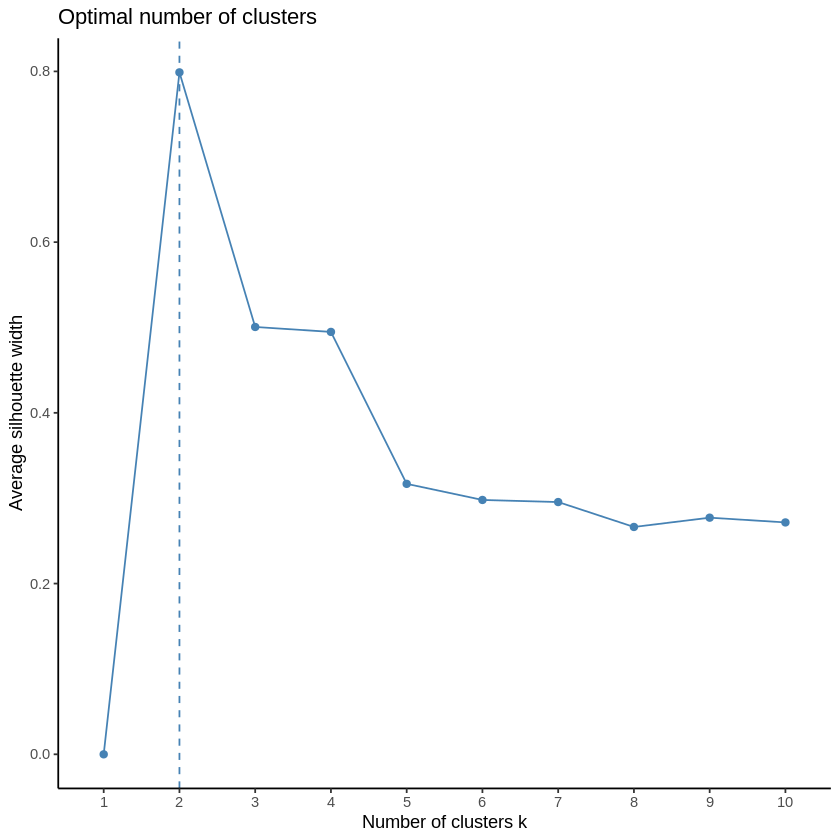

In [ ]:
fviz_nbclust(df, clara, method = "silhouette")+
theme_classic()

In [ ]:
# Compute CLARA
clara.res <- clara(df, 2, samples = 50, pamLike = TRUE)
# Print components of clara.res
print(clara.res)

Call:	 clara(x = df, k = 2, samples = 50, pamLike = TRUE) 
Medoids:
             x         y
S121 -1.531137  1.145057
S455 48.357304 50.233499
Objective function:	 9.87862
Clustering vector: 	 Named int [1:500] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:500] "S1" "S2" "S3" "S4" "S5" "S6" "S7" ...
Cluster sizes:	    	 200 300 
Best sample:
 [1] S37  S49  S54  S63  S68  S71  S76  S80  S82  S101 S103 S108 S109 S118 S121
[16] S128 S132 S138 S144 S162 S203 S210 S216 S231 S234 S249 S260 S261 S286 S299
[31] S304 S305 S312 S315 S322 S350 S403 S450 S454 S455 S456 S465 S488 S497

Available components:
 [1] "sample"     "medoids"    "i.med"      "clustering" "objective" 
 [6] "clusinfo"   "diss"       "call"       "silinfo"    "data"      


In [ ]:
dd <- cbind(df, cluster = clara.res$cluster)
head(dd, n = 4)

x          y        cluster
S1  -9.656526 3.881815 1      
S2   2.219434 5.574150 1      
S3   8.675529 1.484111 1      
S4 -18.765582 5.605868 1

In [ ]:
# Medoids
clara.res$medoids

x         y        
S121 -1.531137  1.145057
S455 48.357304 50.233499

In [ ]:
# Clustering
head(clara.res$clustering, 10)

S1  S2  S3  S4  S5  S6  S7  S8  S9 S10 
  1   1   1   1   1   1   1   1   1   1

**Error: “ggrepel: 453 unlabeled data points (too many overlaps). Consider increasing max.overlaps”**

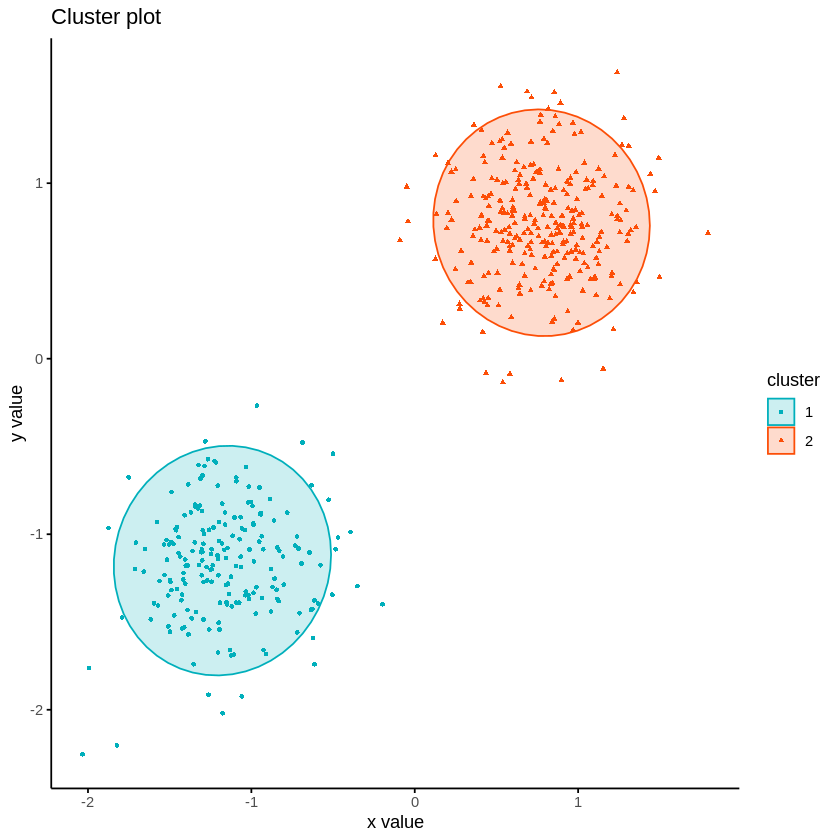

In [ ]:
fviz_cluster(clara.res,
palette = c("#00AFBB", "#FC4E07"), # color palette
ellipse.type = "t", # Concentration ellipse
geom = "point", pointsize = 1,
ggtheme = theme_classic()
)

In [ ]:
# Load the data
data("USArrests")
# Standardize the data
df <- scale(USArrests)
# Show the first 6 rows
head(df, nrow = 6)
# Compute the dissimilarity matrix
# df = the standardized data
res.dist <- dist(df, method = "euclidean")

Murder     Assault   UrbanPop   Rape        
Alabama    1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska     0.50786248 1.1068225 -1.2117642  2.484202941
Arizona    0.07163341 1.4788032  0.9989801  1.042878388
Arkansas   0.23234938 0.2308680 -1.0735927 -0.184916602
California 0.27826823 1.2628144  1.7589234  2.067820292
Colorado   0.02571456 0.3988593  0.8608085  1.864967207

In [ ]:
as.matrix(res.dist)[1:6, 1:6]

Alabama  Alaska   Arizona  Arkansas California Colorado
Alabama    0.000000 2.703754 2.293520 1.289810 3.263110   2.651067
Alaska     2.703754 0.000000 2.700643 2.826039 3.012541   2.326519
Arizona    2.293520 2.700643 0.000000 2.717758 1.310484   1.365031
Arkansas   1.289810 2.826039 2.717758 0.000000 3.763641   2.831051
California 3.263110 3.012541 1.310484 3.763641 0.000000   1.287619
Colorado   2.651067 2.326519 1.365031 2.831051 1.287619   0.000000

In [ ]:
res.hc <- hclust(d = res.dist, method = "ward.D2")

## **Agrupación jerárquica**

El agrupamiento jerárquico **[o análisis de agrupamiento jerárquico (HCA)]** es una alternativa enfoque de la agrupación en clústeres de particiones para agrupar objetos en función de su similitud. 

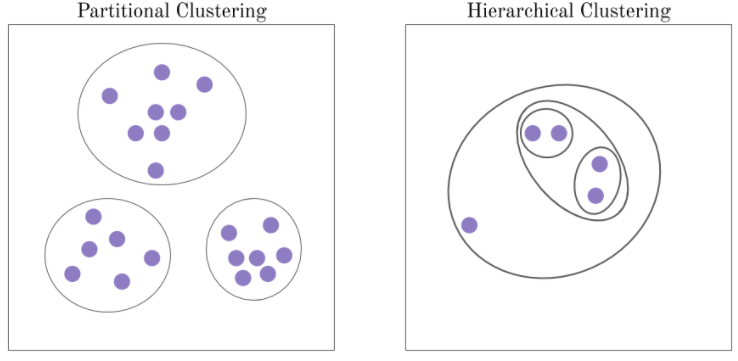

A diferencia de la agrupación en clústeres de particiones, la agrupación jerárquica no requieren pre-especificar el número de clústeres que se producirán.

El agrupamiento jerárquico o **Hierarchical clustering** se puede subdividir en dos tipos:

• **Agrupación aglomerativa** en la que, cada observación se considera inicialmente como un racimo propio (hoja). Luego, los clústeres más similares se fusionan sucesivamente hasta que haya un solo gran clúster (raíz).

• **La agrupación en clústeres dividida**, una operación inversa de la agrupación aglomerativa, comienza con la raíz, en que todos los objetos están incluidos en un grupo. Entonces el más heterogéneo Los conglomerados se dividen sucesivamente hasta que todas las observaciones se encuentran en su propio conglomerado.

El resultado de la agrupación jerárquica es una representación basada en árboles de los objetos, que también se conoce como dendrograma.

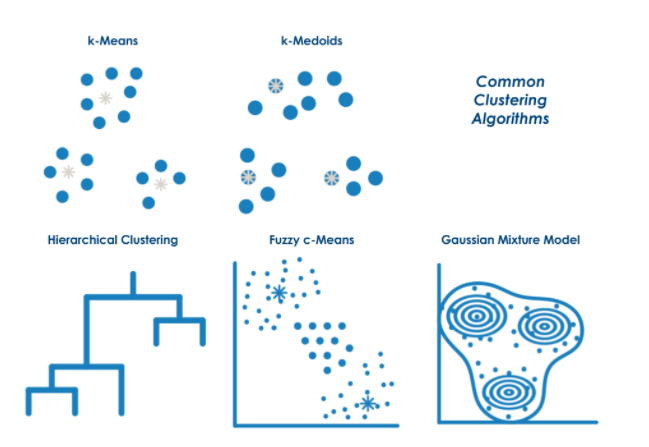

https://manualmodelizandor.netlify.app/tecnicas-de-clustering.html

El dendrograma es una jerarquía multinivel donde los grupos de un nivel se unen
para formar los grupos en los siguientes niveles. Esto permite decidir el nivel en que cortar el árbol para generar grupos adecuados de objetos de datos.

En este capítulo, mostraremos cómo visualizar la disimilitud entre objetos que utilizan dendrogramas.

  * algoritmos de agrupamiento jerárquico 
  * indicamos cómo cortar dendrogramas en grupos
  * comparación de dendogramas

**Bottom up (AGNESS)**

El algoritmo comienza considerndo a cada uno de los valores por separado, es decir, cada objeto es inicialmente considerado como un grupo de un solo elemento (hoja) . A continuación, los pares más parecidos se van fusionando en un grupo más grande que contiene los grupos más similares. Se sigue hasta que todos los puntos están contenidos en un gran closter. 

- agrupaciones pequeñas



**Up Bottom (DIANA)**

El método inverso, DIANA, comienza con el root en el que se supone que todos los datos pertenecen a este y en el que en cada pasa de la iteración se van dividiendo en los dos grupos mas heterogéneos. 

- grandes agrupaciones


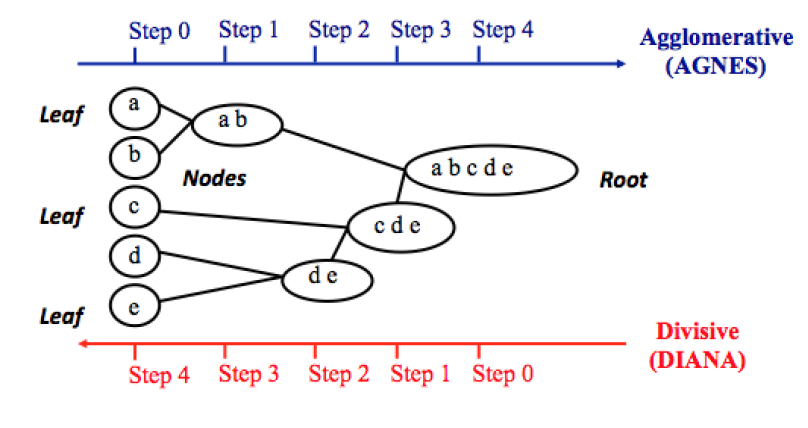

## **Proceso para elaborar un cluster jerárquico aglomerativo**

1. Preparar los datos
2. Calcular la similitud o disimilitud entre la información para cada par de datos dentro del dataset
3. Usar la función de vinculación para agrupar objetos en un árbol de clúster jerárquico de acuerdo con la información generada en el paso previo.
4. Determinar dónde cortar el árbol jerárquico en grupos. 

In [ ]:
# Load the data
data("USArrests")
# Standardize the data
df <- scale(USArrests)
# Show the first 6 rows
head(df, nrow = 6)

Murder     Assault   UrbanPop   Rape        
Alabama    1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska     0.50786248 1.1068225 -1.2117642  2.484202941
Arizona    0.07163341 1.4788032  0.9989801  1.042878388
Arkansas   0.23234938 0.2308680 -1.0735927 -0.184916602
California 0.27826823 1.2628144  1.7589234  2.067820292
Colorado   0.02571456 0.3988593  0.8608085  1.864967207

In [ ]:
# La similitud o disimilitud se puede lograr empleando métricas como la euclidiana o la Manhattan. 
res.dist <- dist(df, method = "euclidean")
as.matrix(res.dist)[1:6, 1:6]

# La función dist calcula y devuelve la matriz de distancia calculada utilizando
# la medida de distancia especificada para calcualr las distancias entre las filas de una matriz de datos.

Alabama  Alaska   Arizona  Arkansas California Colorado
Alabama    0.000000 2.703754 2.293520 1.289810 3.263110   2.651067
Alaska     2.703754 0.000000 2.700643 2.826039 3.012541   2.326519
Arizona    2.293520 2.700643 0.000000 2.717758 1.310484   1.365031
Arkansas   1.289810 2.826039 2.717758 0.000000 3.763641   2.831051
California 3.263110 3.012541 1.310484 3.763641 0.000000   1.287619
Colorado   2.651067 2.326519 1.365031 2.831051 1.287619   0.000000

### Cálculo de la similitud o disimilitud 
https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust

función hclust

Hay muchos métodos de aglomeración de conglomerados (es decir, métodos de vinculación). Lo mas los métodos de vinculación comunes se describen a continuación.

• **Vinculación máxima o completa:** la distancia entre dos conglomerados se define como el valor máximo de todas las distancias por pares entre los elementos en el grupo 1
y los elementos del grupo 2. Tiende a producir grupos más compactos.

• **Enlace mínimo o único:** se define la distancia entre dos conglomerados como el valor mínimo de todas las distancias por pares entre los elementos en el grupo 1 y los elementos del grupo 2. Tiende a producir grupos largos y "sueltos".

• **Vinculación media o media:** la distancia entre dos conglomerados se define como la distancia media entre los elementos del conglomerado 1 y los elementos del conglomerado 2.

• **Enlace centroide:** la distancia entre dos grupos se define como la distancia entre el centroide del conglomerado 1 (un vector medio de variables de longitud p) y el centroide del conglomerado 2.

• **Método de varianza mínima de Ward:** minimiza la varianza total dentro del grupo.

En cada paso, el par de grupos con una distancia mínima entre grupos se fusionan.

Los preferidos son:
**Vinculación máxima o completa:**
**Ward's**

In [ ]:
res.hc <- hclust(d = res.dist, method = "ward.D2")


### **Dendograma**

Corresponde con la representación del árbol jerarquico generado por la función *hclust()*. 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


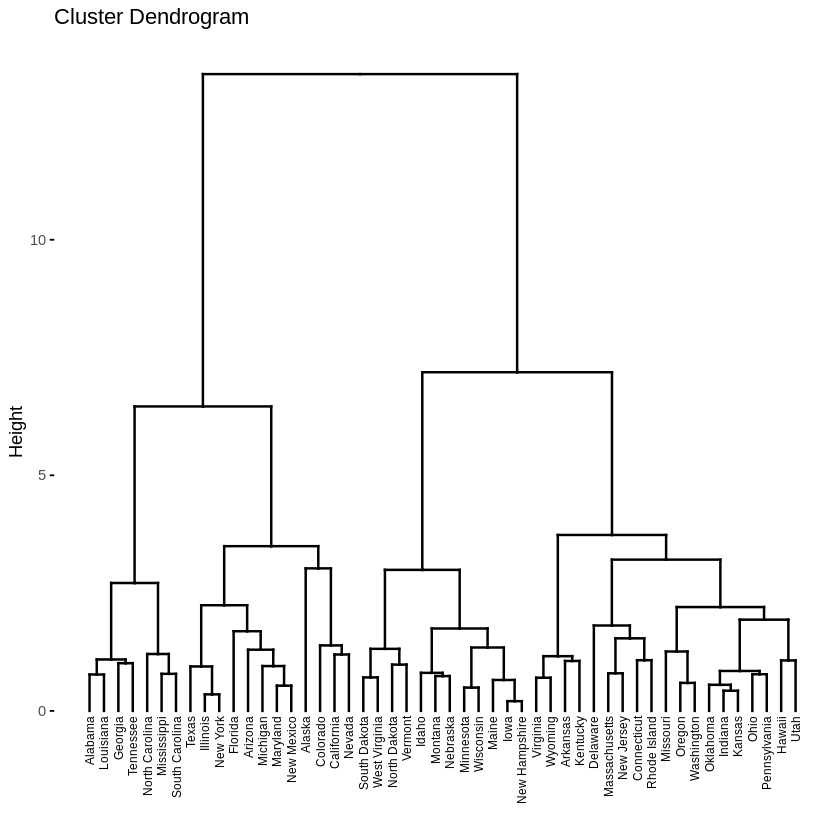

In [ ]:
# cex: label size
library("factoextra")
fviz_dend(res.hc, cex = 0.5)

En el dendrograma que se muestra arriba, cada hoja corresponde a un objeto. Mientras nos movemos arriba del árbol, los objetos que son similares entre sí se combinan en ramas, que
ellos mismos están fusionados a una altura mayor.

La altura de la fusión, proporcionada en el eje vertical, indica la (dis) similitud / distancia entre dos objetos / grupos. Cuanto mayor sea la altura de la fusión, menos similar será la los objetos son. Esta altura se conoce como la *distancia cofenética* entre los dos objetos.

### **Validación del Closter**

Después de vincular los objetos de un conjunto de datos en un árbol de clúster jerárquico, es posible que desee
para evaluar que las distancias (es decir, alturas) en el árbol reflejan las distancias originales
precisamente.


Una forma de medir qué tan bien el árbol de clúster generado por la función hclust () refleja sus datos es calcular la correlación entre las distancias cofenéticas y los datos de distancia originales generados por la función dist (). Si el agrupamiento es válido, la vinculación de objetos en el árbol del clúster debe tener una fuerte correlación con el distancias entre objetos en la matriz de distancias original.


Cuanto más se acerque el valor del coeficiente de correlación a 1, con mayor precisión será el La solución de agrupamiento refleja sus datos. Se considera que los valores superiores a 0,75 son buenos. El método de vinculación "promedio" parece producir valores altos de esta estadística. Esto puede
ser una de las razones por las que es tan popular.

La función de base R cophenetic () se puede utilizar para calcular las distancias cofenéticas para agrupación jerárquica.

In [ ]:
# Compute cophentic distance
res.coph <- cophenetic(res.hc)
# Correlation between cophenetic distance and
# the original distance
cor(res.dist, res.coph)

[1] 0.6975266

Ahora se ejecuta usando el método de vinculación promedio. 

In [ ]:
res.hc2 <- hclust(res.dist, method = "average")
cor(res.dist, cophenetic(res.hc2))

[1] 0.7180382

El coeficiente de correlación muestra que el uso de un método de vinculación diferente crea un árbol que representa las distancias originales un poco mejor.


### **Corte del árbol jerárquico**

Uno de los problemas con la agrupación jerárquica es que no nos dice cuántos Clusterings se deben establecer o donde cortar el dendrograma para formar racimos.

Puede cortar el árbol jerárquico a una altura determinada para dividir sus datos en grupos. La función base R cutree () se puede utilizar para cortar un árbol, generado por la función hclust (), en varios grupos especificando el número deseado de
grupos o la altura de corte. 

Devuelve un vector que contiene el número de clúster de cada
observación.

In [ ]:
# Cut tree into 4 groups
grp <- cutree(res.hc, k = 4)
head(grp, n = 4)
grp

Alabama   Alaska  Arizona Arkansas 
       1        2        2        3

Alabama         Alaska        Arizona       Arkansas     California 
             1              2              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              4              2              3              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              4              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              4              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             4              4              2              4              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              4              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             4              1              2              3              4 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              4              4              3

In [ ]:
# Number of members in each cluster
table(grp)

grp
 1  2  3  4 
 7 12 19 12 

In [ ]:
# Get the names for the members of cluster 1
rownames(df)[grp == 1]

[1] "Alabama"        "Georgia"        "Louisiana"      "Mississippi"   
[5] "North Carolina" "South Carolina" "Tennessee"

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


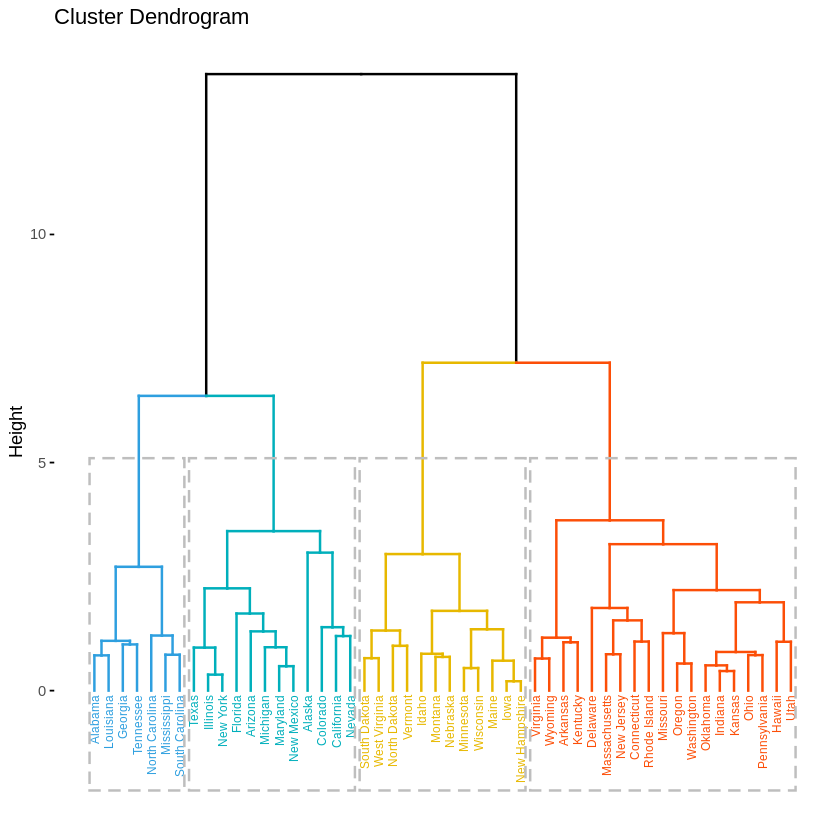

In [ ]:
# Cut in 4 groups and color by groups
fviz_dend(res.hc, k = 4, # Cut in four groups
cex = 0.5, # label size
k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
color_labels_by_k = TRUE, # color labels by groups
rect = TRUE # Add rectangle around groups
)

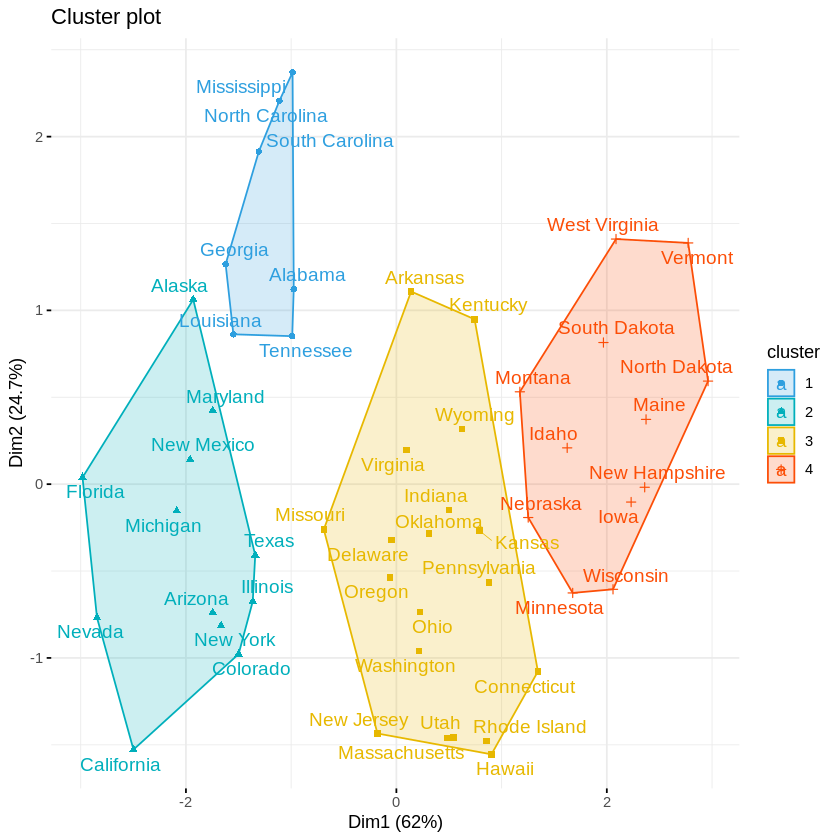

In [ ]:
fviz_cluster(list(data = df, cluster = grp),
palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
ellipse.type = "convex", # Concentration ellipse
repel = TRUE, # Avoid label overplotting (slow)
show.clust.cent = FALSE, ggtheme = theme_minimal())

## Paquetería Closter de R


In [ ]:
library("cluster")
# Agglomerative Nesting (Hierarchical Clustering)
res.agnes <- agnes(x = USArrests, # data matrix
stand = TRUE, # Standardize the data
metric = "euclidean", # metric for distance matrix
method = "ward" # Linkage method
)
# DIvisive ANAlysis Clustering
res.diana <- diana(x = USArrests, # data matrix
stand = TRUE, # standardize the data
metric = "euclidean" # metric for distance matrix
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


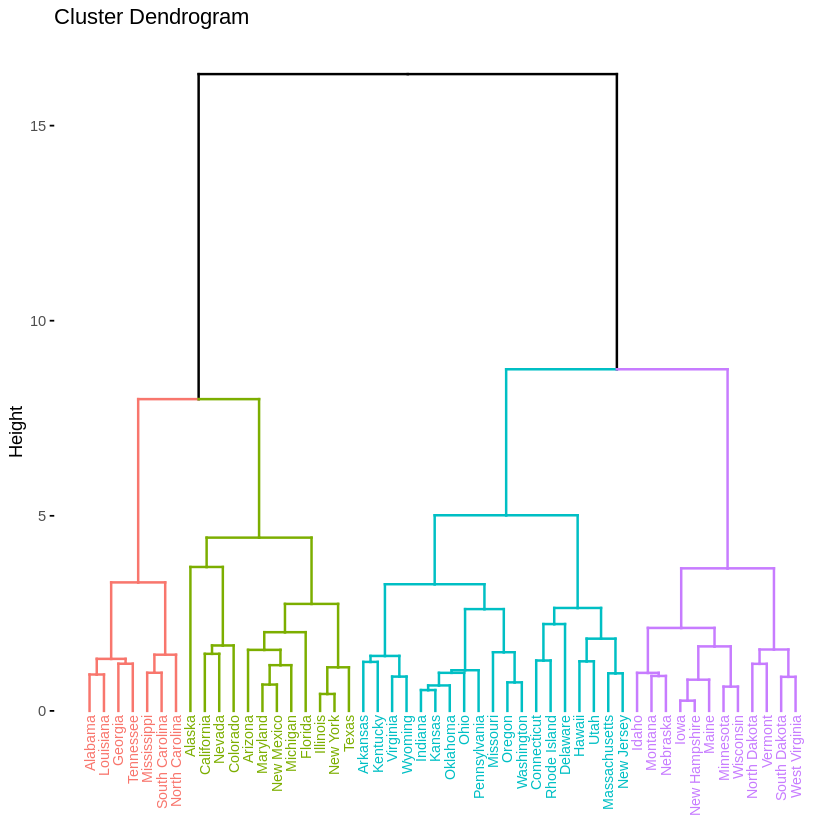

In [ ]:
fviz_dend(res.agnes, cex = 0.6, k = 4)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


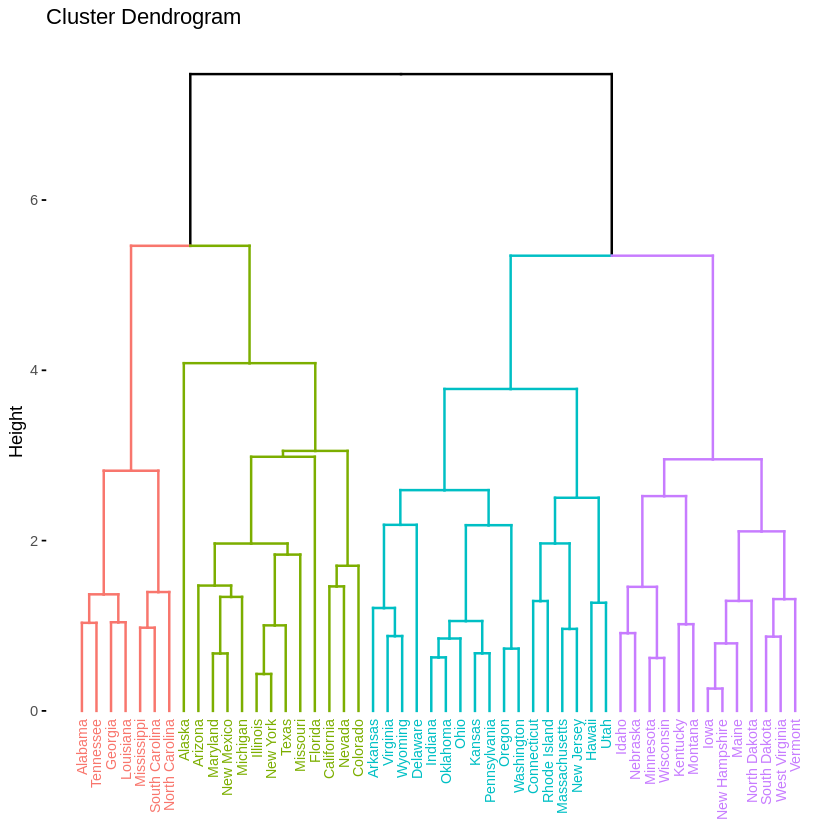

In [ ]:
fviz_dend(res.diana, cex = 0.6, k = 4)

## Comparación de Dendogramas

Aquí emplearemos el paquete **dendextend de R**.

Esta función cuenta un conjunto de funciones para comparar dendogramas. Nos enfocaremos en las siguientes: 

• tanglegram() para la comparación visual de dos dendogramas

• and cor.dendlist() para computar la matriz de correlación entre los dos dendogramas

Para visualizar esta comparación seleccionamos de manera aleatoria 10 renglos de los 50 que se tienen originalmente. 

In [ ]:
#install.packages("dendextend")
library("dendextend")


---------------------
Welcome to dendextend version 1.15.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




In [ ]:
df <- scale(USArrests)

# Subset containing 10 rows
set.seed(123)
ss <- sample(1:50, 10)
df <- df[ss,]

In [ ]:
## Calculamos distancias

res.dist <- dist(df, method = "euclidean")

In [ ]:
# Computamos 2 clusters jerárquicos empleando dos métodos distintos de linkage 

In [ ]:
hc1 <- hclust(res.dist, method = "average")
hc2 <- hclust(res.dist, method = "ward.D2")

In [ ]:
#se generan dos dendogramas
dend1 <- as.dendrogram (hc1)
dend2 <- as.dendrogram (hc2)

In [ ]:
# visualizamos ambos dendogramas
dend_list <- dendlist(dend1, dend2)

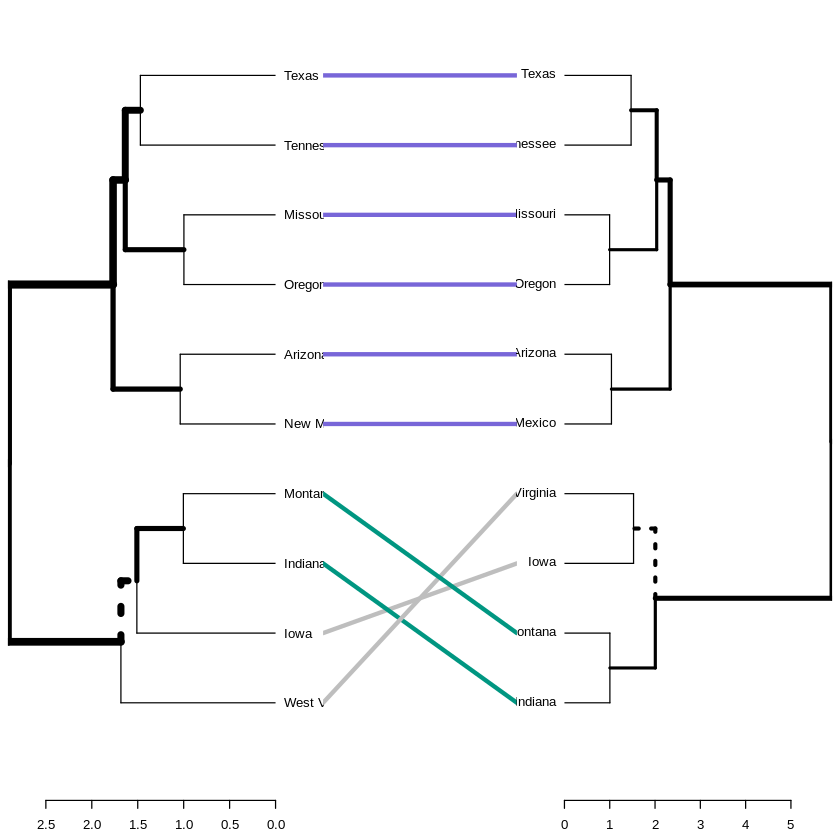

In [ ]:
tanglegram(dend1, dend2)

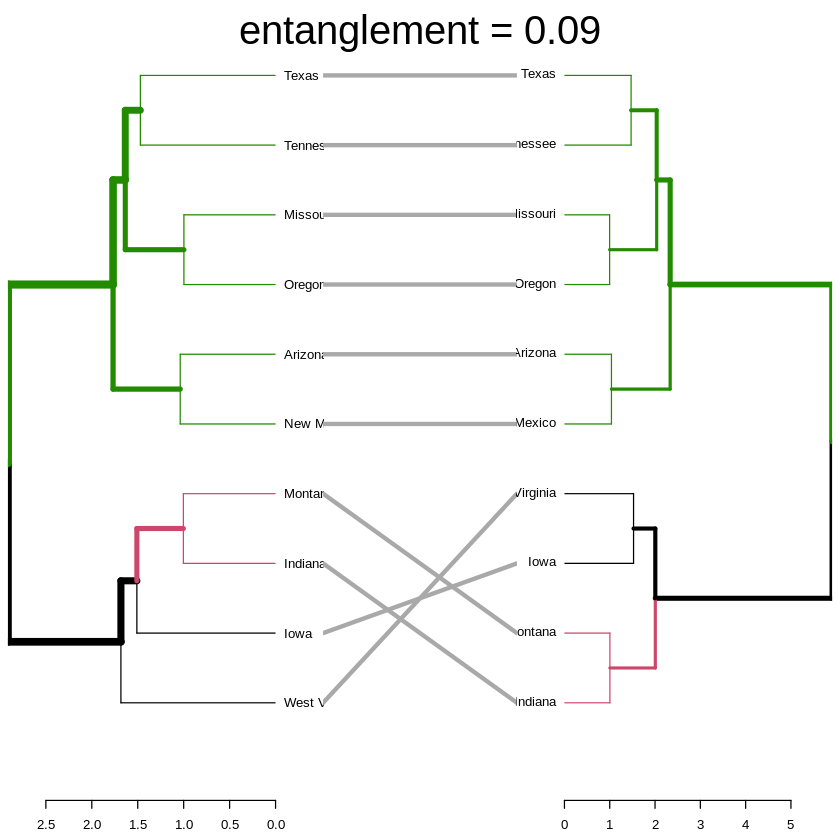

In [ ]:
tanglegram(dend1, dend2,
highlight_distinct_edges = FALSE, # Turn-off dashed lines
common_subtrees_color_lines = FALSE, # Turn-off line colors
common_subtrees_color_branches = TRUE, # Color common branches
main = paste("entanglement =", round(entanglement(dend_list), 2))
)

### Matriz de correlación entre una lista de dendrogramas

Recordemos que una medida de proximidad es la correlación cofenética que se define como el coeficiente de correlación de Pearson entre los $\frac{n(n+1)}{2}$

La función **cor.dendlist()** se usa para computar la correlación cofenética entre dos dendogramas. El valor puede estar entre 0 y 1, lo que significa que si el valor es 1 las matrices son iguales. 

In [ ]:
##Cophenetic correlation matrix
cor.dendlist(dend_list, method = "cophenetic")

[,1]      [,2]     
[1,] 1.0000000 0.9925544
[2,] 0.9925544 1.0000000

In [ ]:
cor.dendlist(dend_list, method = "baker")

[,1]      [,2]     
[1,] 1.0000000 0.9895528
[2,] 0.9895528 1.0000000

In [ ]:
# Cophenetic correlation coefficient
cor_cophenetic(dend1, dend2)

[1] 0.9925544

In [ ]:
# Baker correlation coefficient
cor_bakers_gamma(dend1, dend2)

[1] 0.9895528

In [ ]:
dend1 <- df %>% dist %>% hclust("complete") %>% as.dendrogram
dend2 <- df %>% dist %>% hclust("single") %>% as.dendrogram
dend3 <- df %>% dist %>% hclust("average") %>% as.dendrogram
dend4 <- df %>% dist %>% hclust("centroid") %>% as.dendrogram

In [ ]:
dend_list <- dendlist(dend1, dend3)

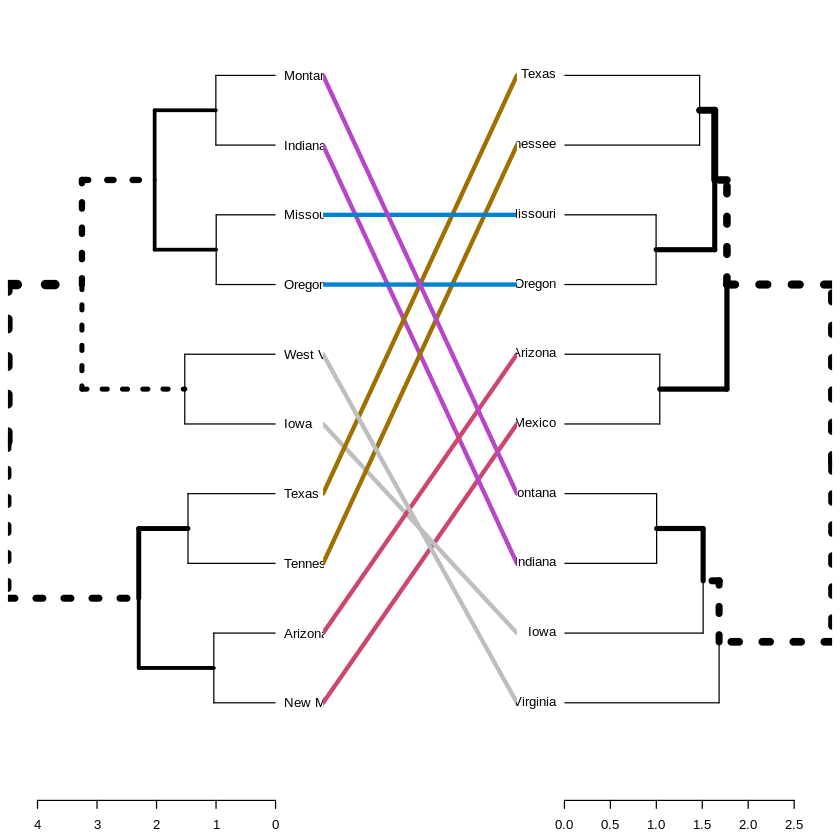

In [ ]:
tanglegram(dend1, dend3)

In [ ]:
dend_list <- dendlist(dend2, dend4)

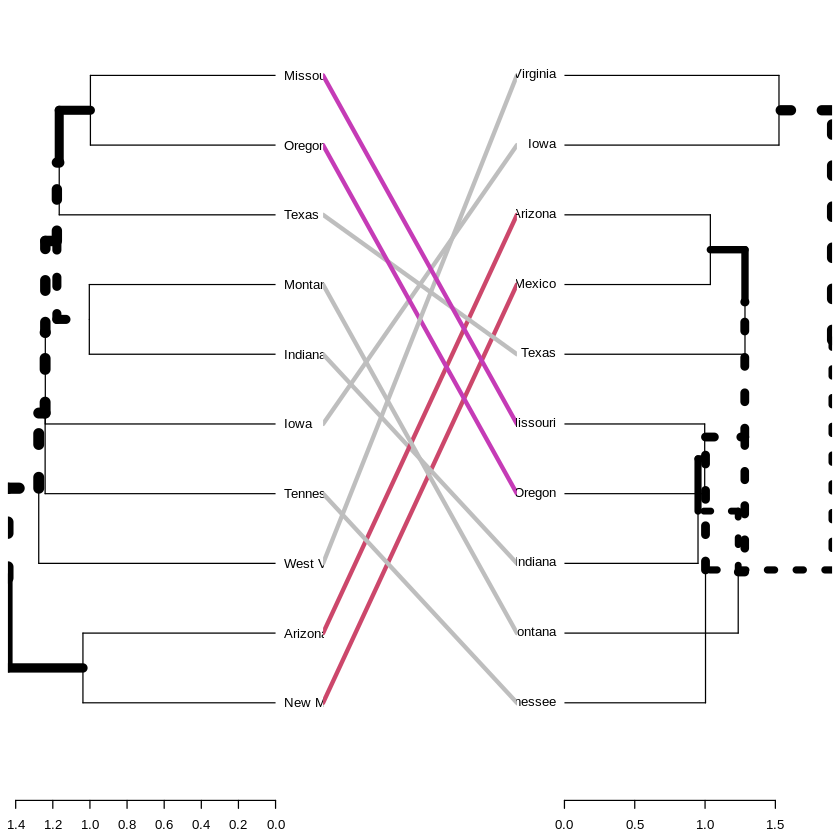

In [ ]:
tanglegram(dend2, dend4)

In [ ]:
dend_list <- dendlist("Complete" = dend1, "Single" = dend2,
"Average" = dend3, "Centroid" = dend4)
cors <- cor.dendlist(dend_list)

In [ ]:
round(cors, 2)

Complete Single Average Centroid
Complete 1.00     0.46   0.45    0.30    
Single   0.46     1.00   0.23    0.17    
Average  0.45     0.23   1.00    0.31    
Centroid 0.30     0.17   0.31    1.00

corrplot 0.91 loaded



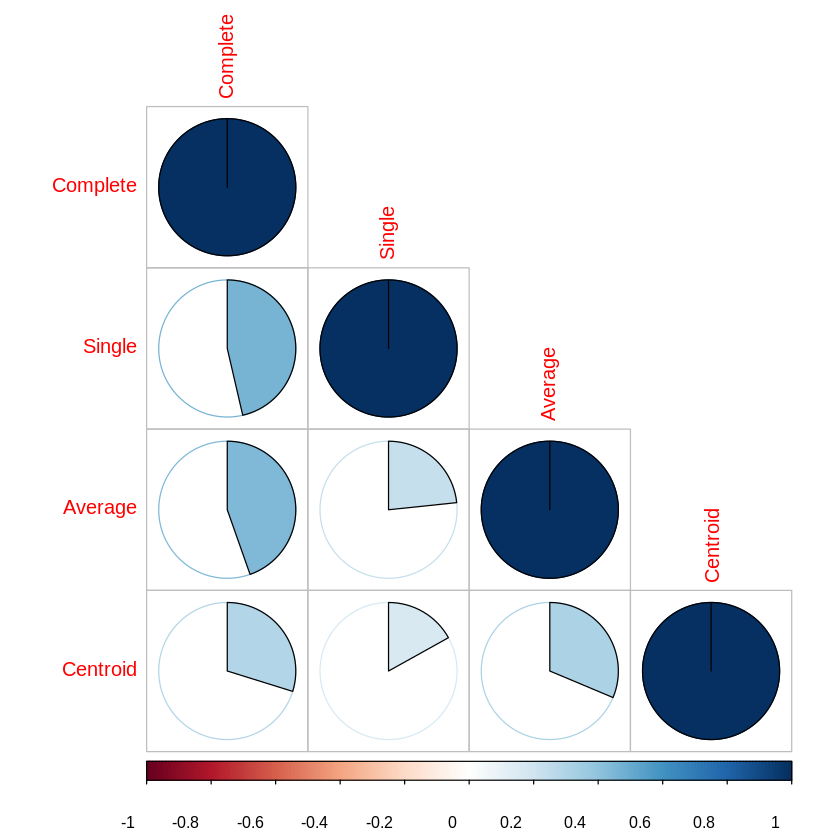

In [ ]:
library(corrplot)
corrplot(cors, "pie", "lower")

# Visualizando Dendogramas

In [ ]:
data(USArrests)

In [ ]:
dd <- dist(scale(USArrests), method = "euclidean")
hc <- hclust(dd, method = "ward.D2")

In [ ]:
install.packages( "dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


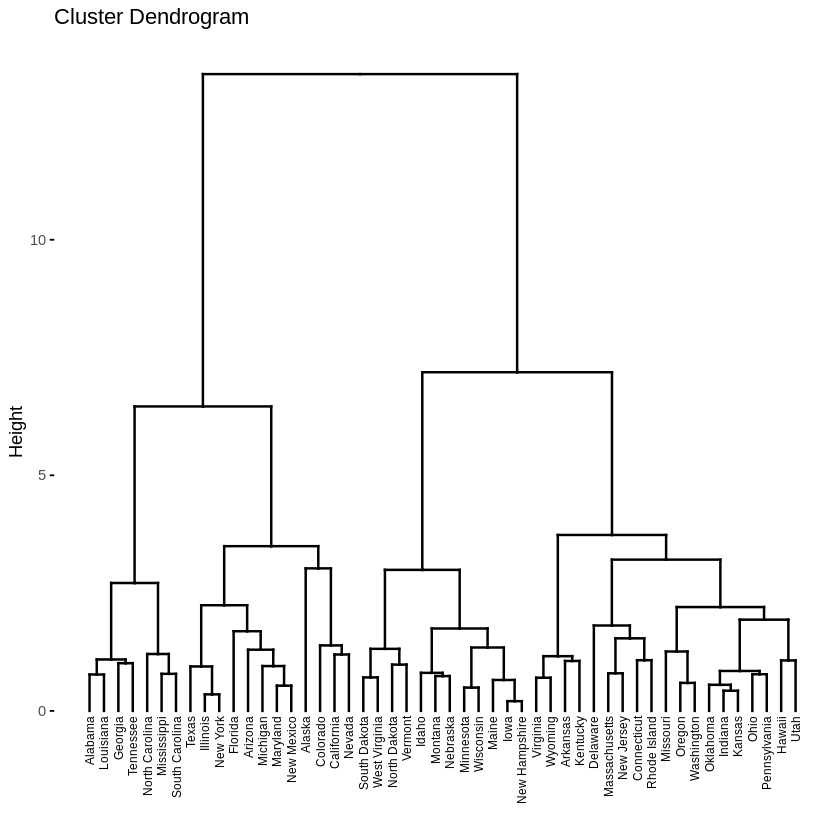

In [ ]:
library(factoextra)
fviz_dend(hc, cex = 0.5)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


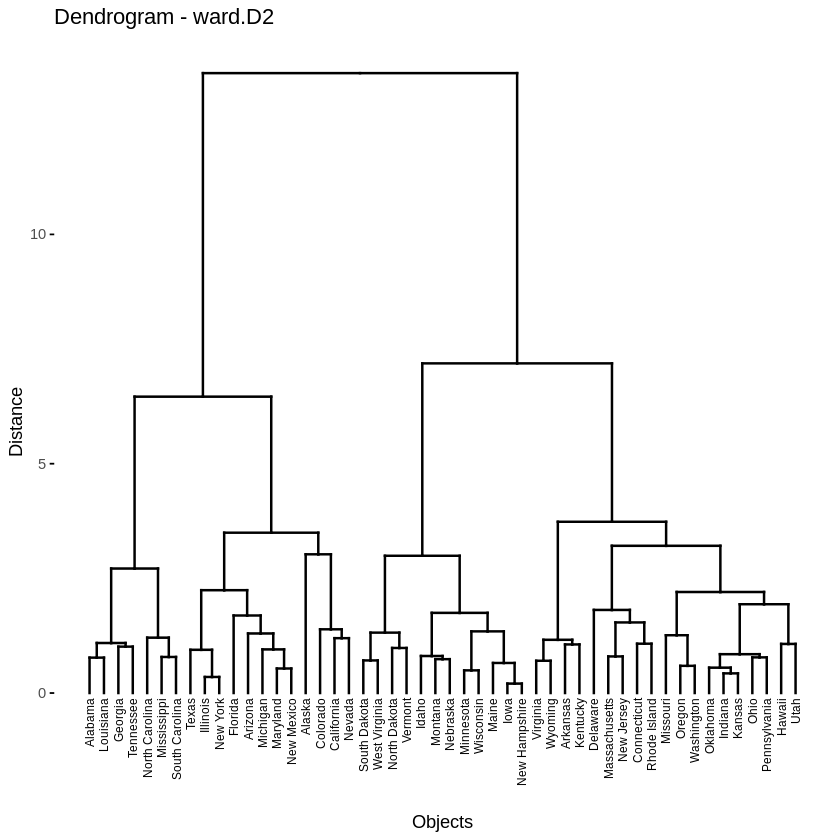

In [ ]:
fviz_dend(hc, cex = 0.5,
main = "Dendrogram - ward.D2",
xlab = "Objects", ylab = "Distance", sub = "")

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


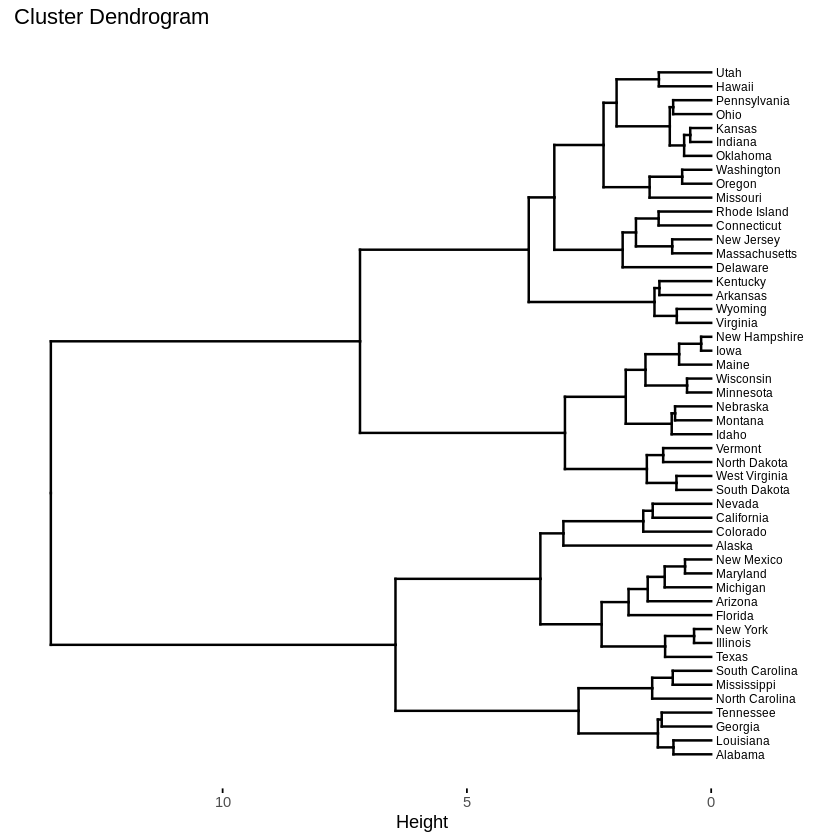

In [ ]:
fviz_dend(hc, cex = 0.5, horiz = TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message in if (color == "cluster") color <- "default":
“the condition has length > 1 and only the first element will be used”


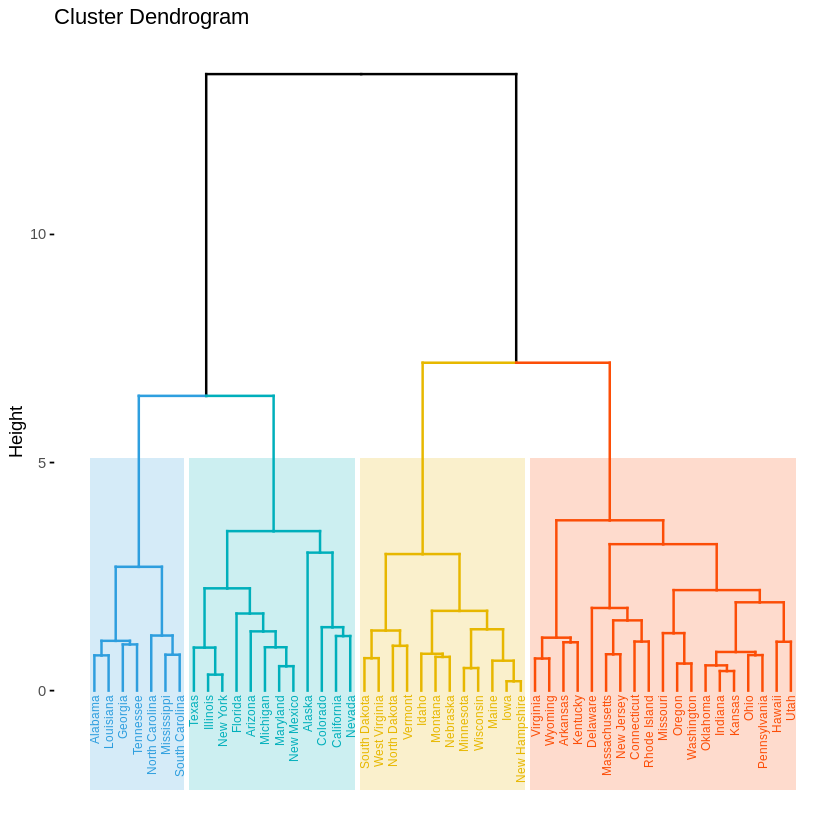

In [ ]:
fviz_dend(hc, k = 4, # Cut in four groups
cex = 0.5, # label size
k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
color_labels_by_k = TRUE, # color labels by groups
rect = TRUE, # Add rectangle around groups
rect_border = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
rect_fill = TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


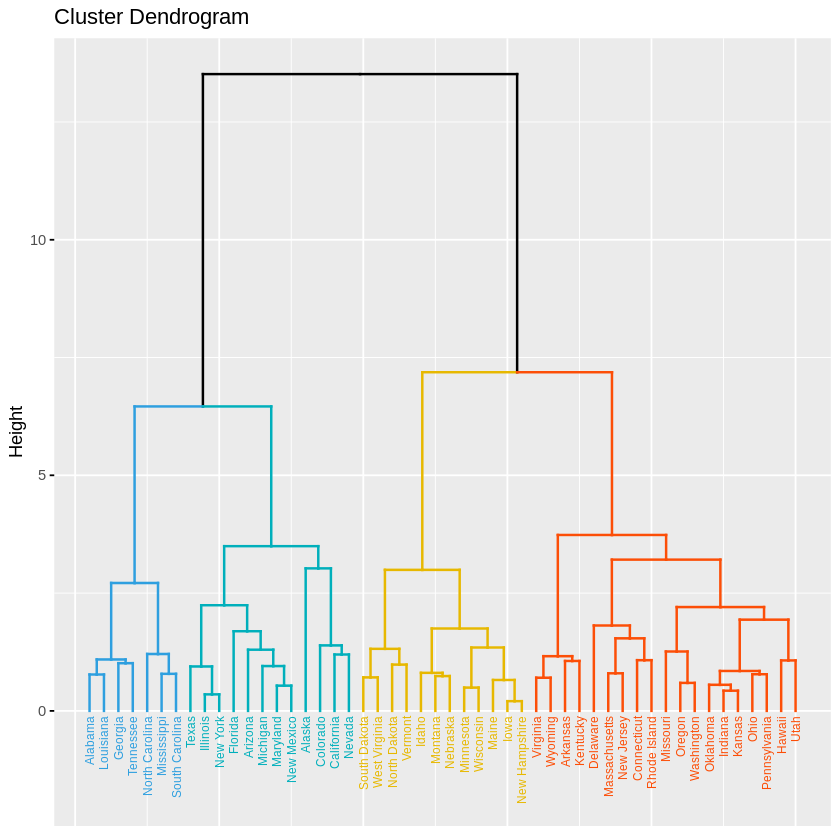

In [ ]:
fviz_dend(hc, k = 4, # Cut in four groups
cex = 0.5, # label size
k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
color_labels_by_k = TRUE, # color labels by groups
ggtheme = theme_gray() # Change theme
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


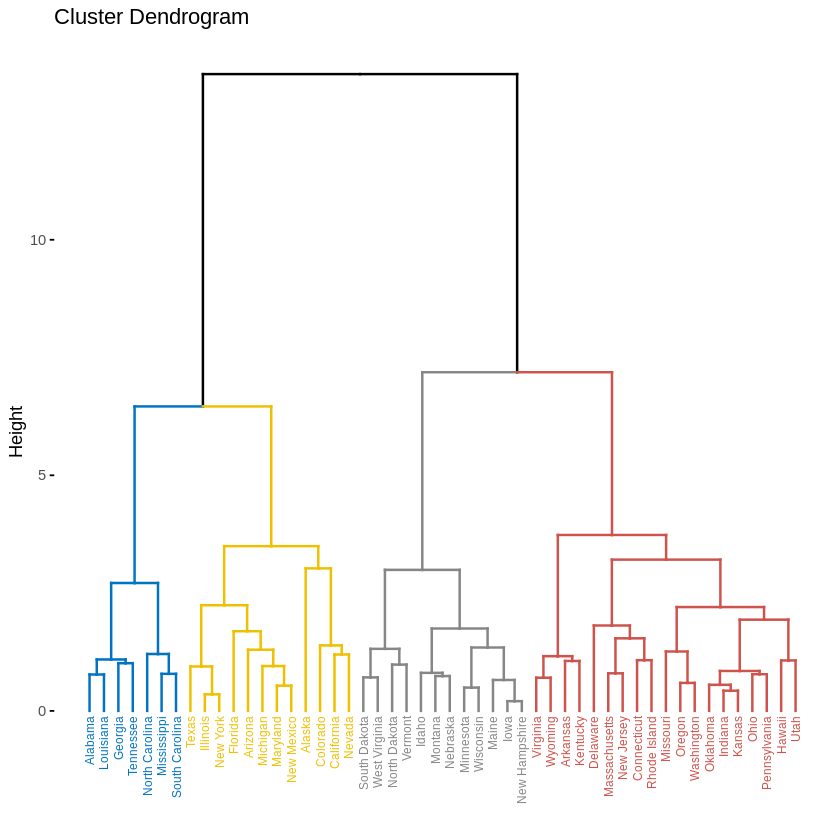

In [ ]:
fviz_dend(hc, cex = 0.5, k = 4, # Cut in four groups
k_colors = "jco")

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


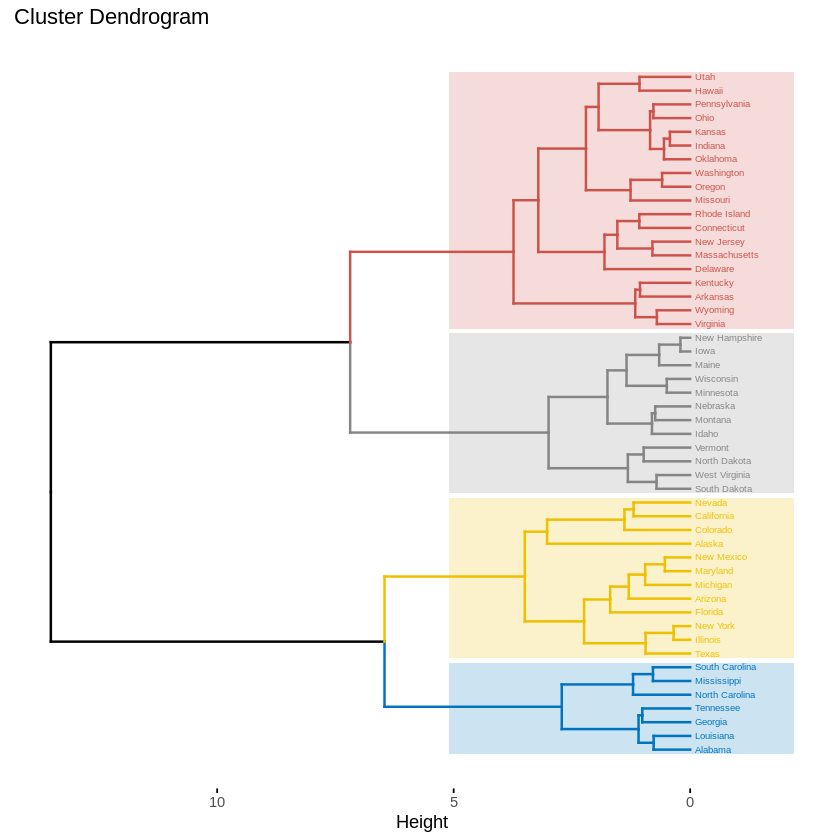

In [ ]:
fviz_dend(hc, k = 4, cex = 0.4, horiz = TRUE, k_colors = "jco",
rect = TRUE, rect_border = "jco", rect_fill = TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


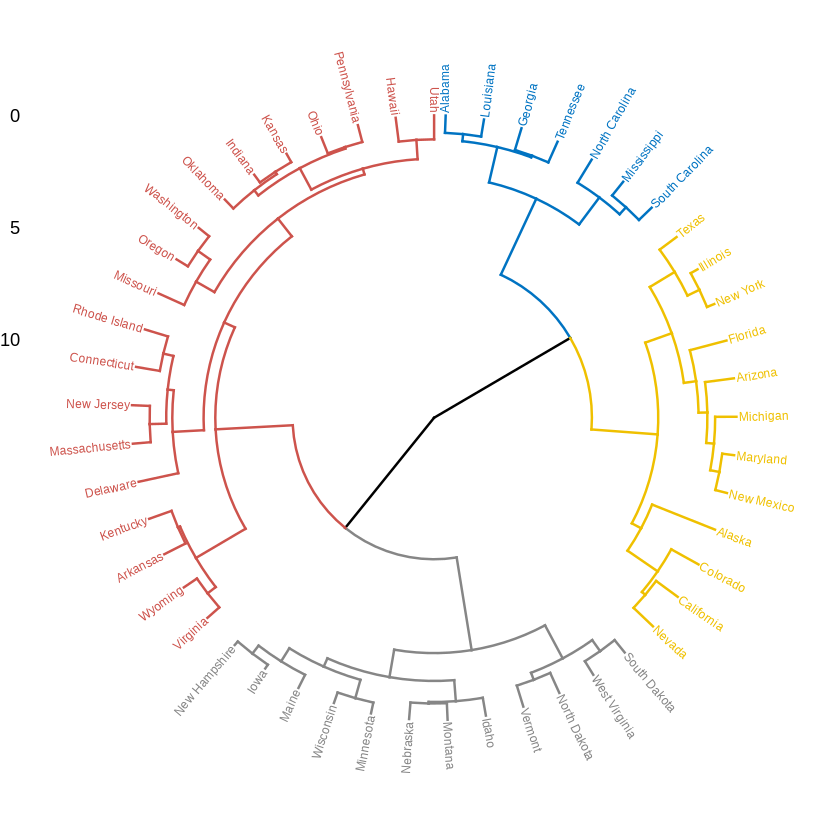

In [ ]:
fviz_dend(hc, cex = 0.5, k = 4,
k_colors = "jco", type = "circular")

In [ ]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



https://igraph.org/r/

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




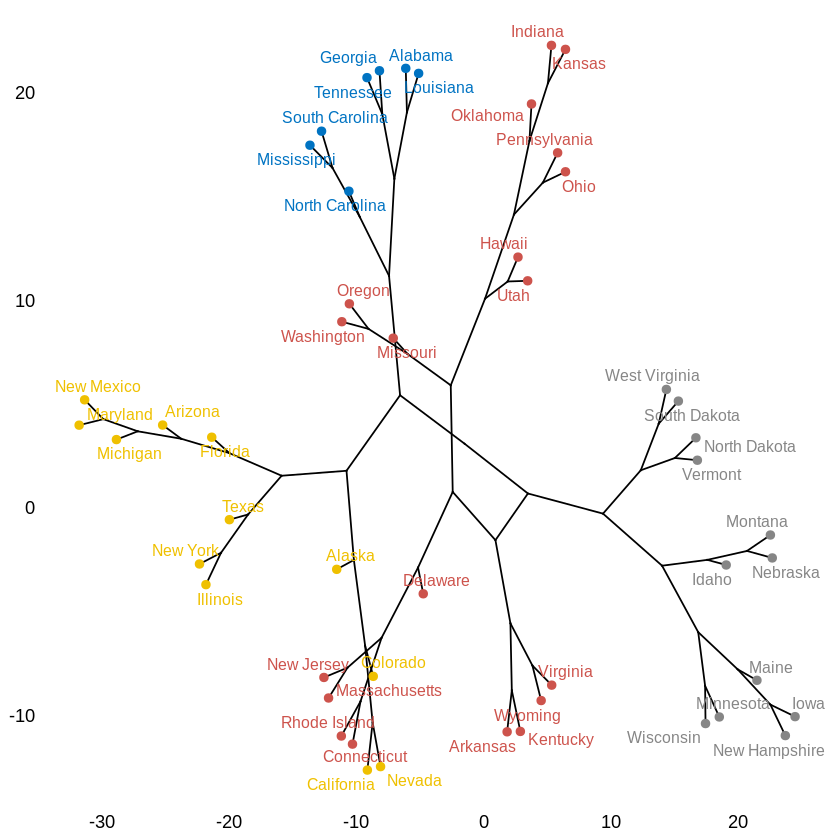

In [ ]:
require("igraph")
fviz_dend(hc, k = 4, k_colors = "jco",
type = "phylogenic", repel = TRUE)

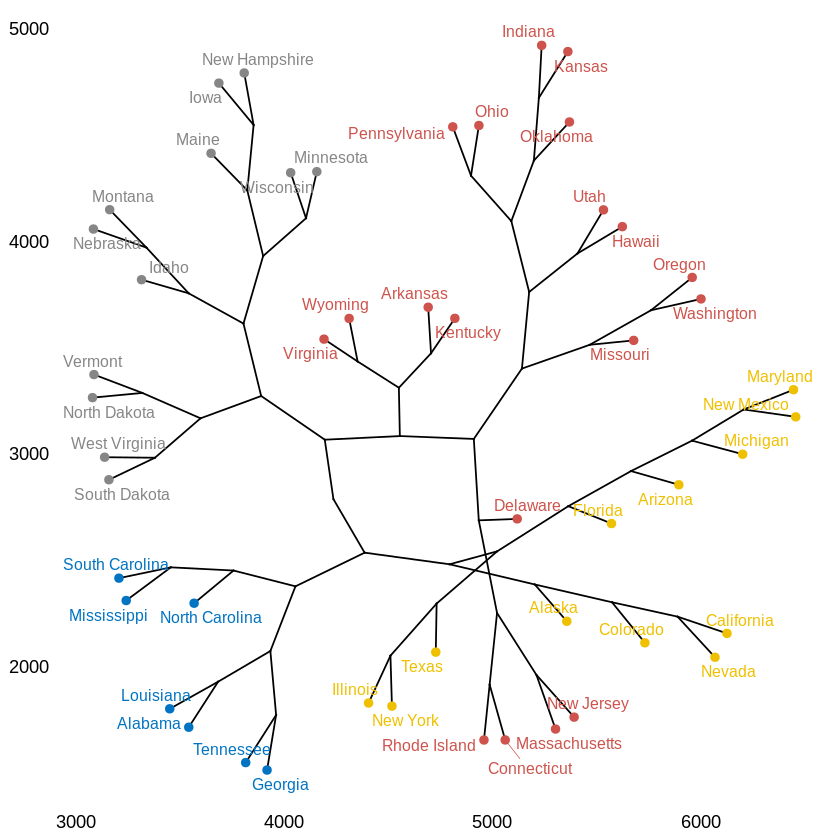

In [ ]:
require("igraph")
fviz_dend(hc, k = 4, # Cut in four groups
k_colors = "jco",
type = "phylogenic", repel = TRUE,
phylo_layout = "layout.gem")

# **Cluster validation**

La validación de la agrupación consiste en medir la bondad de los resultados de la agrupación.

Antes de aplicar cualquier algoritmo de agrupación en clústeres a un conjunto de datos, lo primero que debe hacer es evaluar la tendencia a la agrupación. Es decir, si la aplicación de la agrupación en clústeres es adecuada para el datos. En caso afirmativo, 
¿cuántos clústeres hay? A continuación, puede realizar jerarquías agrupación en clústeres o agrupación en clústeres de particiones (con un número predeterminado de clústeres). Finalmente,
puede utilizar una serie de medidas, descritas en esta parte, para evaluar la bondad de los resultados de la agrupación.

Contenido:

• Evaluación de la tendencia a la agrupación

• Determinación del número óptimo de clústeres

• Estadísticas de validación de conglomerados

• Elegir los mejores algoritmos de agrupamiento

• Calcular el valor p para la agrupación jerárquica

Antes de aplicar cualquier método de agrupación en clústeres en sus datos, es importante evaluar si
los conjuntos de datos contienen agrupaciones significativas (es decir, estructuras no aleatorias) o no. Si sí, entonces cuántos clústeres hay. Este proceso se define como la evaluación de tendencia de agrupamiento o la viabilidad del análisis de agrupamiento.

Un gran problema, en el análisis de conglomerados, es que los métodos de agrupamiento devolverán clústeres incluso si los datos no contienen ningún clúster. En otras palabras, si aplica ciegamente un
método de agrupamiento en un conjunto de datos, dividirá los datos en grupos porque eso es
lo que se supone que debe hacer.

En este capítulo, comenzamos describiendo por qué deberíamos evaluar la tendencia a la agrupación
antes de aplicar cualquier método de agrupamiento en un dato. A continuación, proporcionamos estadísticas y
métodos visuales para evaluar la tendencia a la agrupación.

In [ ]:
install.packages("clustertend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Base de datos 
El conjunto de datos iris de R
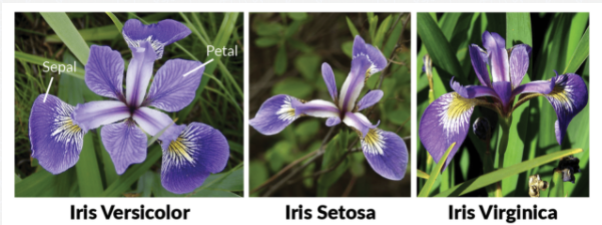


In [ ]:
head(iris, 3)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa

In [ ]:
# Eiminamos la columna del tipo de especie
df <- iris[, -5]

# Generamos datos aleatorios con base en el conjunto de datos iris
random_df <- apply(df, 2, function(x){runif(length(x), min(x), (max(x)))})
random_df <- as.data.frame(random_df)

# Estandarizamos al conjunto de datos
df <- iris.scaled <- scale(df)
random_df <- scale(random_df)

### Inspección visual de los datos
Comenzamos visualizando los datos para evaluar si contienen algún racimos.

Como los datos contienen más de dos variables, necesitamos reducir la dimensionalidad
para trazar un diagrama de dispersión. Esto se puede hacer mediante el análisis de componentes principales.
(PCA) algoritmo. 

In [ ]:
prcomp(df)

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

In [ ]:
prcomp(random_df)

Standard deviations (1, .., p=4):
[1] 1.1877914 1.0393338 0.9031032 0.8326712

Rotation (n x k) = (4 x 4):
                    PC1        PC2           PC3         PC4
Sepal.Length -0.5660509  0.4056947 -0.3271536959 -0.63872424
Sepal.Width  -0.2587749 -0.7407874 -0.6154565115  0.07404625
Petal.Length  0.6184896 -0.2884581 -0.0007899882 -0.73093219
Petal.Width  -0.4796796 -0.4510407  0.7170656299 -0.22866272

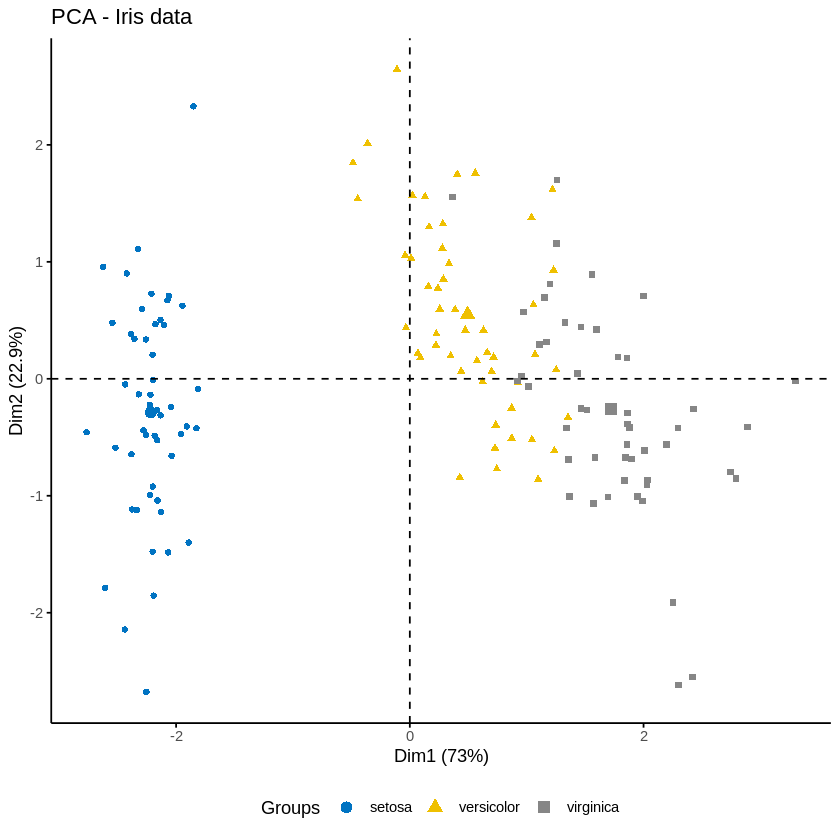

In [ ]:
library("factoextra")

fviz_pca_ind(prcomp(df), title = "PCA - Iris data",
habillage = iris$Species, palette = "jco", geom = "point", ggtheme = theme_classic(), legend = "bottom")

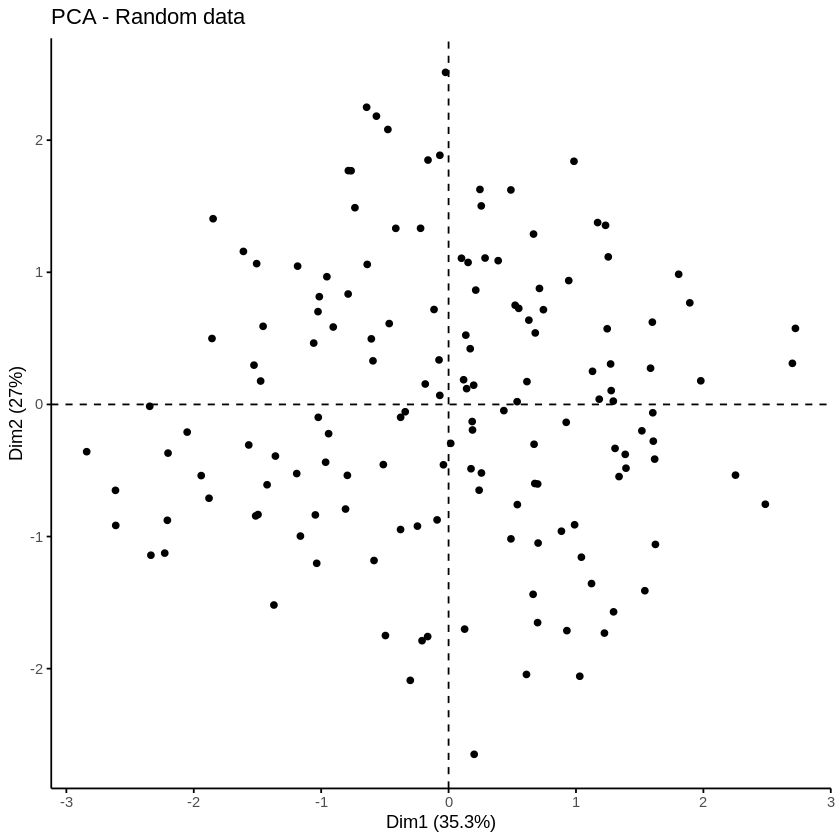

In [ ]:
# Plot the random df
fviz_pca_ind(prcomp(random_df), title = "PCA - Random data",
geom = "point", ggtheme = theme_classic())

Podemos observar que en el conjunto de datos original los datos se distribuyen en 3 grupos, por otro lado cuando se analiza el conjunto de datos generado de manera aleatoria no hay ninguna tendencia. 

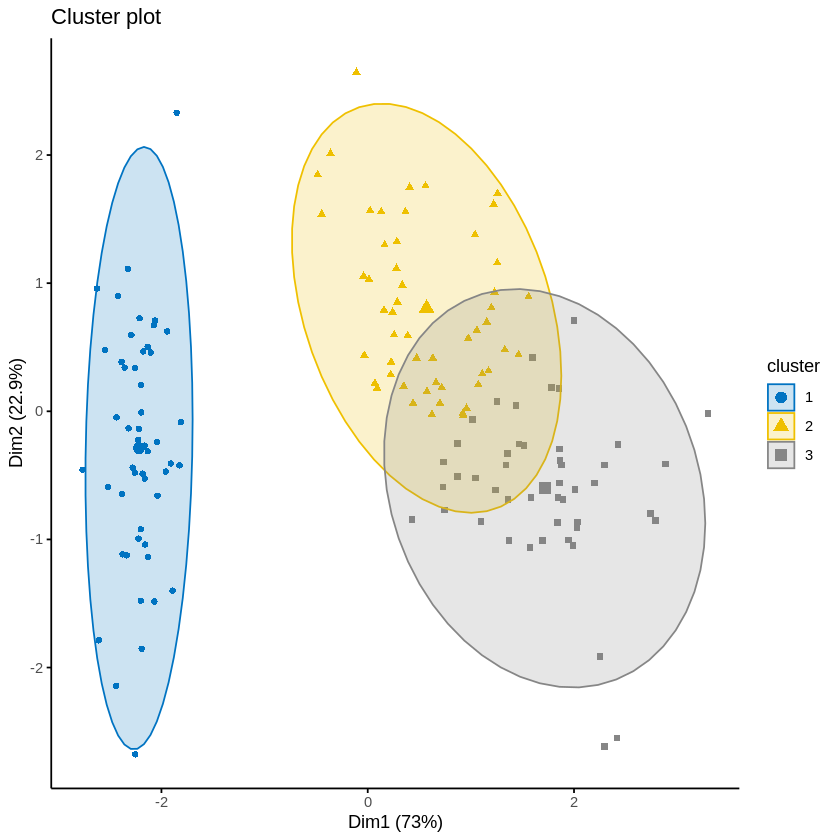

In [ ]:
# Comenzamos el agrupamiento con Kmeans
library(factoextra)
set.seed(123)
# K-means on iris dataset
km.res1 <- kmeans(df, 3)
fviz_cluster(list(data = df, cluster = km.res1$cluster),
ellipse.type = "norm", geom = "point", stand = FALSE,
palette = "jco", ggtheme = theme_classic())

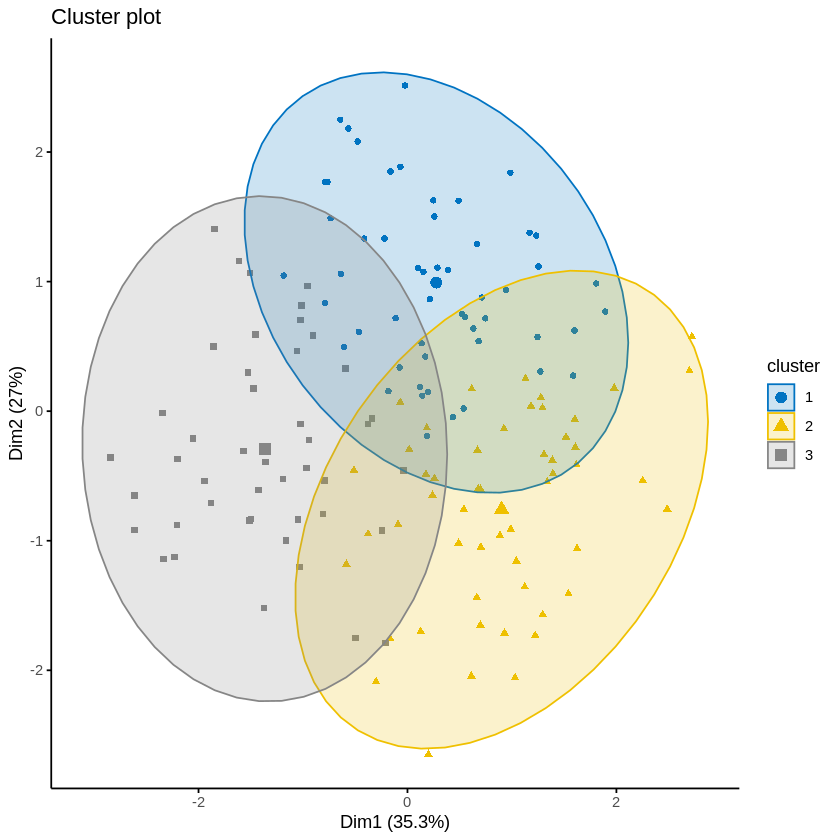

In [ ]:
# K-means on the random dataset
km.res2 <- kmeans(random_df, 3)
fviz_cluster(list(data = random_df, cluster = km.res2$cluster),
ellipse.type = "norm", geom = "point", stand = FALSE,
palette = "jco", ggtheme = theme_classic())

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


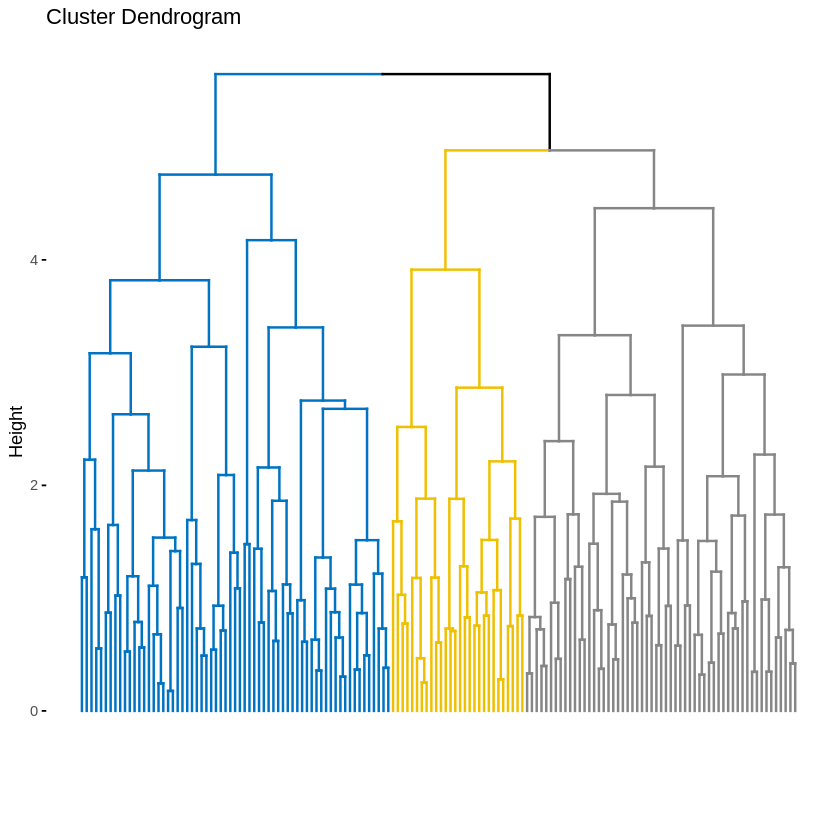

In [ ]:
# Hierarchical clustering on the random dataset
fviz_dend(hclust(dist(random_df)), k = 3, k_colors = "jco",
as.ggplot = TRUE, show_labels = FALSE)

Lo que podemos concluir en ambos casos es que aunque no se identifico ningún agrupamiento en el PCA el clustering por K-medias y el dendograma arrojan un agrupamiento pues esa es la indicación que se proporciona. 

A continuación, describirremos dos métodos para analizar la tendencia de los clusters:

- Hopkins statistic
- Visual Assessment of cluster Tendency (VAT)

### **Hopkins statistics**
El estadístico Hopkins permite evaluar la tendencia de clustering de un conjunto de datos mediante el cálculo de la probabilidad de que dichos datos procedan de una distribución uniforme, es decir, estudia la distribución espacial aleatoria de las observaciones. 

**Proceso**
 * Extraer una muestra uniforme de $n$ observaciones $(p1,…, pn)$ del set de datos estudiado.

 * Para cada observación pi seleccionada, encontrar la observación vecina más cercana $pj$ y calcular la distancia entre ambas, $xi=dist(pi,pj)$.

 * Simular un conjunto de datos de tamaño $n$, $(q1,…, qn)$ extraídos de una distribución uniforme con la misma variación que los datos originales.

 * Para cada observación simulada $qi$, encontrar la observación vecina más cercana $qj$ y calcular la distancia entre ambas, $yi=dist(qi,qj)$.

 * Calcular el estadístico Hopkins (H) se expresa como la media de las distancias de vecinos más cercanos en el set de datos simulados, dividida por la suma de las medias de las distancias vecinas más cercanas del set de datos original y el simulado.

 **interpretación**

 Las hipótesis nula y alternativa se definen de la siguiente manera:

• Hipótesis nula: el conjunto de datos D se distribuye uniformemente (es decir, no racimos)

• Hipótesis alternativa: el conjunto de datos D no se distribuye uniformemente (es decir,
contiene agrupaciones significativas)

  * Si el estadistico $H$ es cercano a 0 implica se rechaza la hipótesis nula e implica que existen evidencias para generar agrupaciones de datos y que de generar los closters correctamente, los grupos describirán la realidad. 

  * Si el estadistico $H$ es cercano a 0.5 los datos son muy similares, lo cual implica que no tiene mucho caso generar clusters

https://www.cienciadedatos.net/documentos/37_clustering_y_heatmaps



In [ ]:
library(clustertend)
# Compute Hopkins statistic for iris dataset
set.seed(123)
hopkins(df, n = nrow(df)-1)

$H
[1] 0.1815219

In [ ]:
set.seed(123)
hopkins(random_df, n = nrow(random_df)-1)

$H
[1] 0.5145653

## Métodos visuales

##Visual Assessment of cluster Tendency (VAT)

1. Calcule la matriz de disimilitud (DM) entre los objetos en el conjunto de datos usando la medida de la distancia euclidiana.

2. Reordene el DM para que los objetos similares estén cerca unos de otros. Este proceso crea una matriz de disimilitud ordenada (ODM).

3. El ODM se muestra como una imagen de disimilitud ordenada (ODI), que es
la salida visual del IVA.

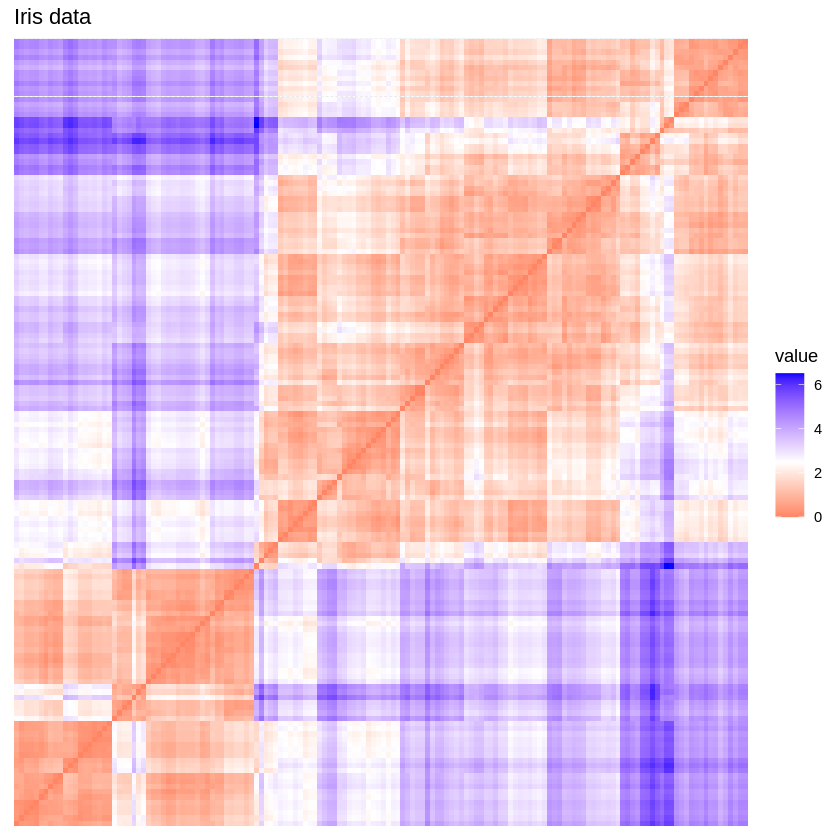

In [ ]:
fviz_dist(dist(df), show_labels = FALSE)+
labs(title = "Iris data")
#rojo es alta similitud dist (xi, xj) = 0
#azul, baja similitud  dist (xi, xj) = 1

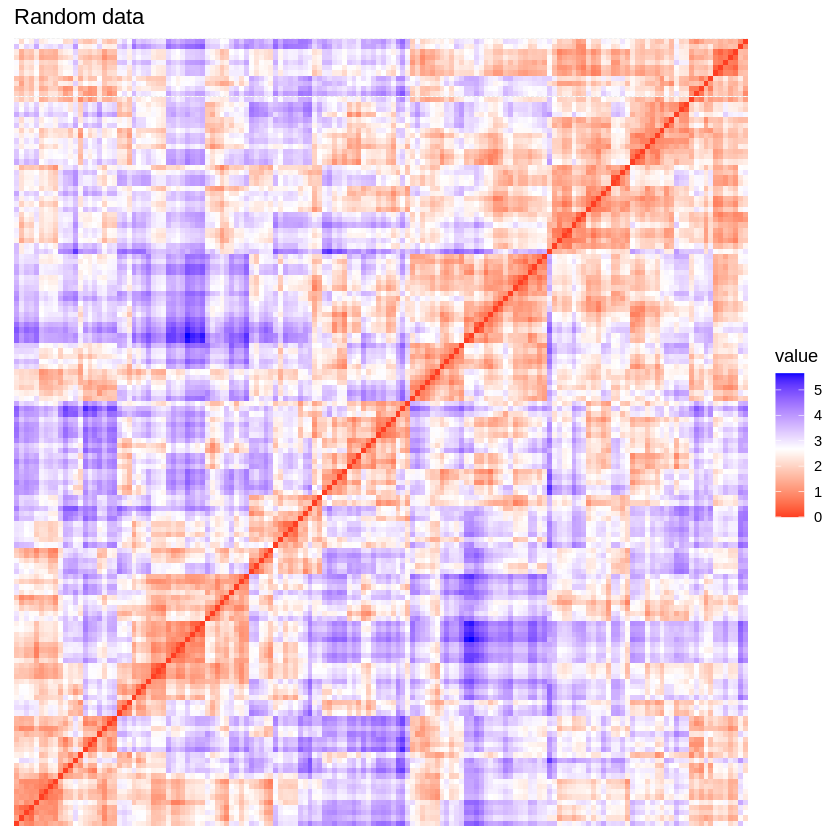

In [ ]:
fviz_dist(dist(random_df), show_labels = FALSE)+
labs(title = "Random data")

# Determinando el número óptimo de clústers

Existen diferentes métodos para determinar el número óptimo de clusters sin embargo, recordemos que la selección del método y de cómo se tomen los datos es un tanto subjetiva por esta razón se darán diferentes métodos, directos y métodos de prueba estadísticos:

1. Métodos directos: consiste en optimizar un criterio, como el dentro del clúster.
sumas de cuadrados o la silueta media. Los métodos correspondientes se nombran
métodos de codo y silueta, respectivamente.

2. Métodos de prueba estadística: consiste en comparar evidencia contra hipótesis nula.
Un ejemplo es la estadística de brechas.
Además de los métodos estadísticos de codo, silueta y brecha, hay más de treinta
otros índices y métodos que se han publicado para identificar el número óptimo de conglomerados. Proporcionaremos códigos R para calcular estos 30 índices con el fin de decidir
el mejor número de conglomerados utilizando la "regla de la mayoría".

In [ ]:
pkgs <- c("NbClust")
install.packages(pkgs)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("NbClust")

In [ ]:
df <- scale(USArrests)
head(df)

Murder     Assault   UrbanPop   Rape        
Alabama    1.24256408 0.7828393 -0.5209066 -0.003416473
Alaska     0.50786248 1.1068225 -1.2117642  2.484202941
Arizona    0.07163341 1.4788032  0.9989801  1.042878388
Arkansas   0.23234938 0.2308680 -1.0735927 -0.184916602
California 0.27826823 1.2628144  1.7589234  2.067820292
Colorado   0.02571456 0.3988593  0.8608085  1.864967207

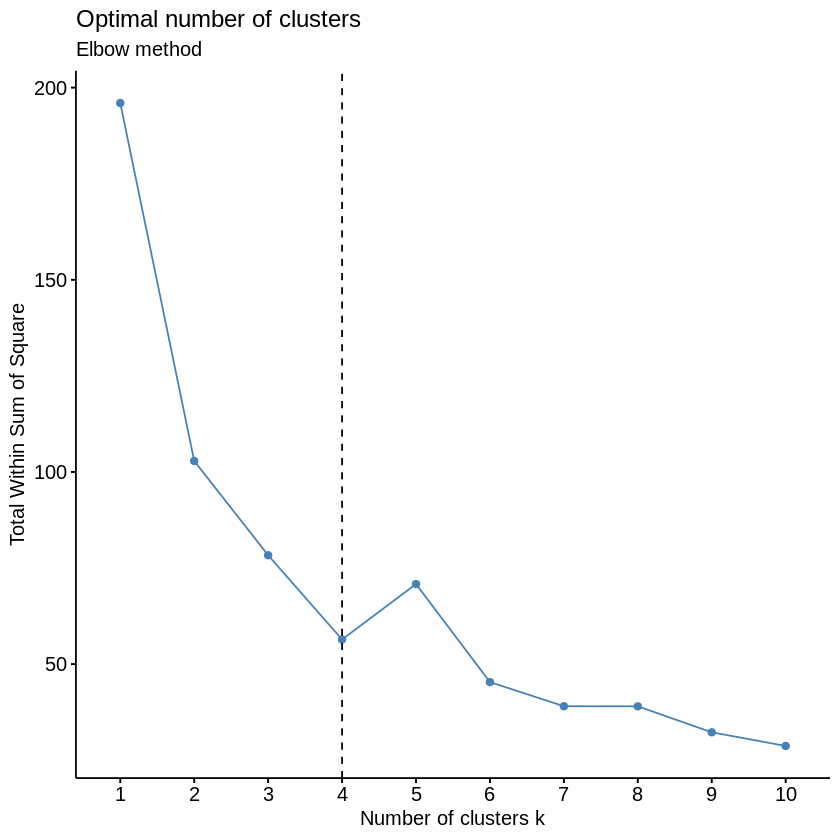

In [ ]:
# Elbow method
fviz_nbclust(df, kmeans, method = "wss") +
geom_vline(xintercept = 4, linetype = 2)+
labs(subtitle = "Elbow method")

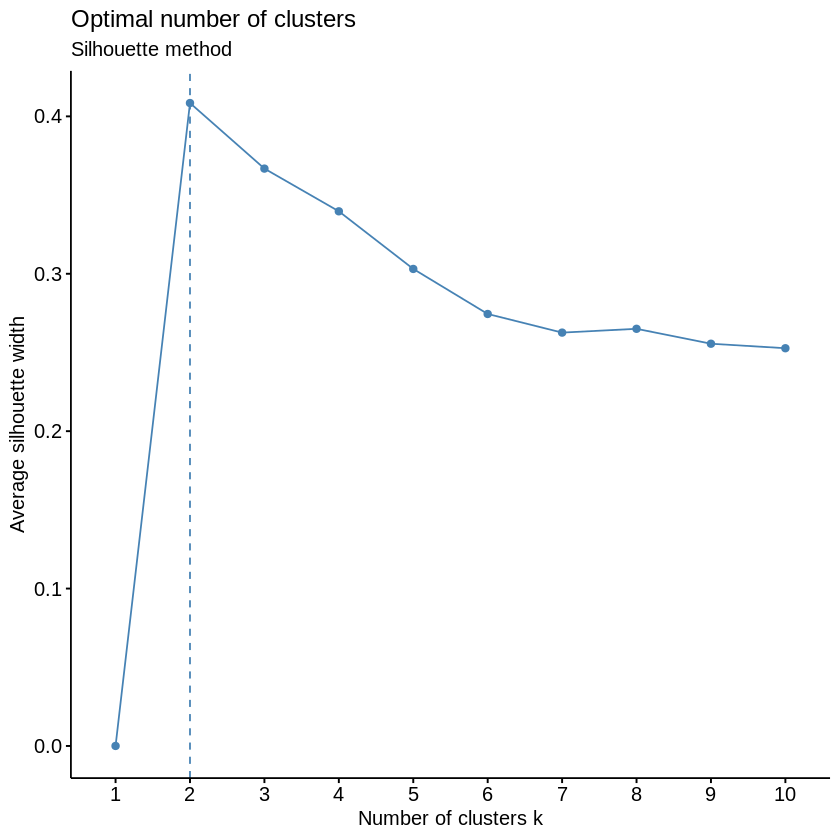

In [ ]:
# Silhouette method
fviz_nbclust(df, kmeans, method = "silhouette")+
labs(subtitle = "Silhouette method")

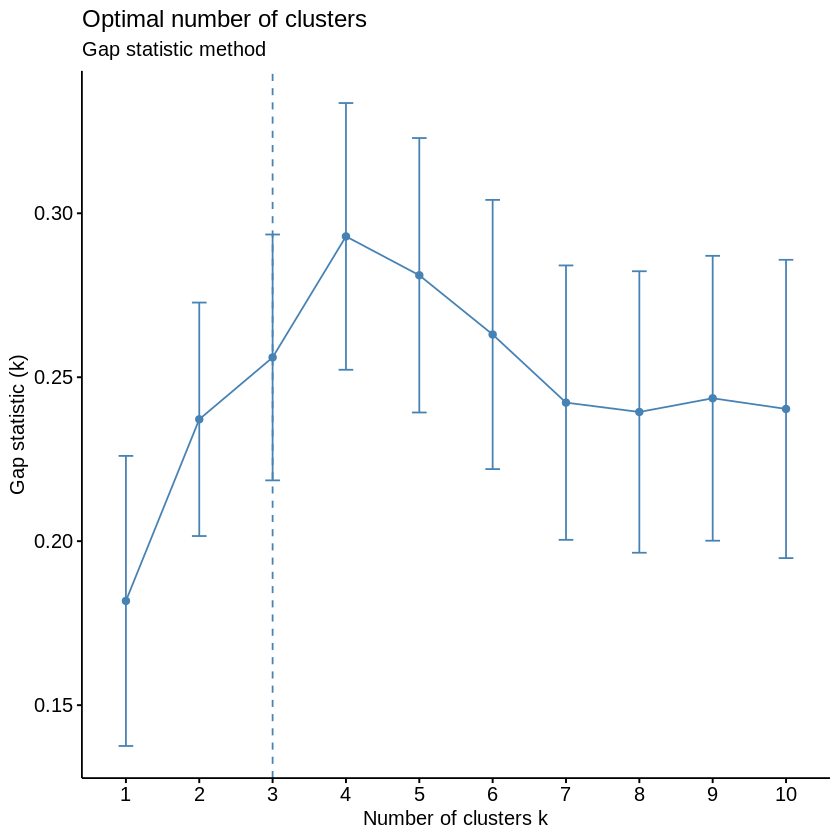

In [ ]:
set.seed(123)
fviz_nbclust(df, kmeans, nstart = 25, method = "gap_stat", nboot = 50) +
labs(subtitle = "Gap statistic method")


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


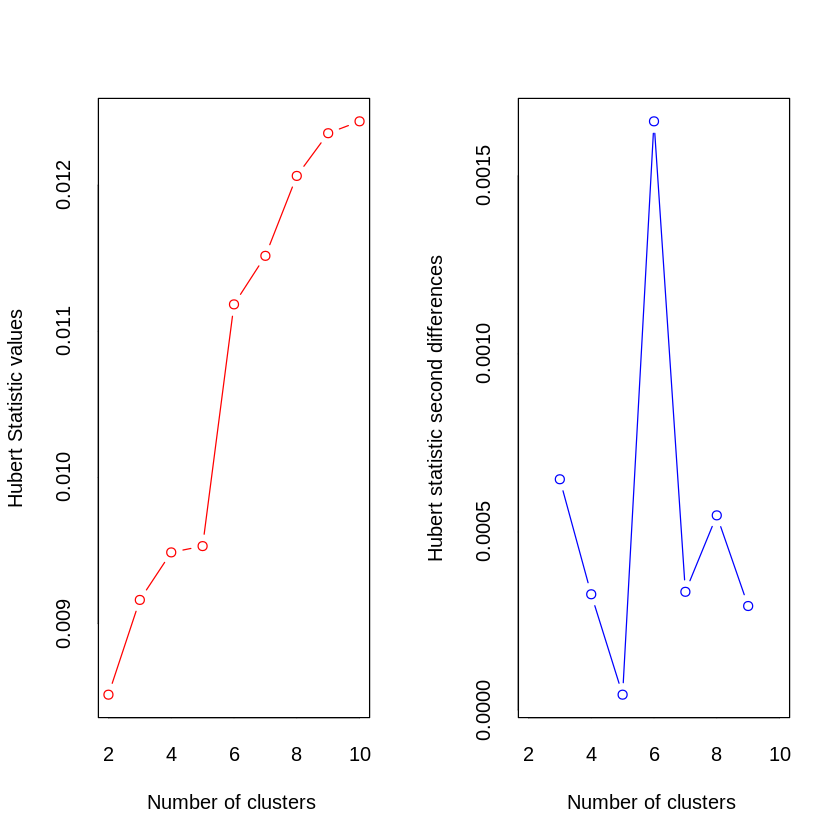

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 7 proposed 6 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


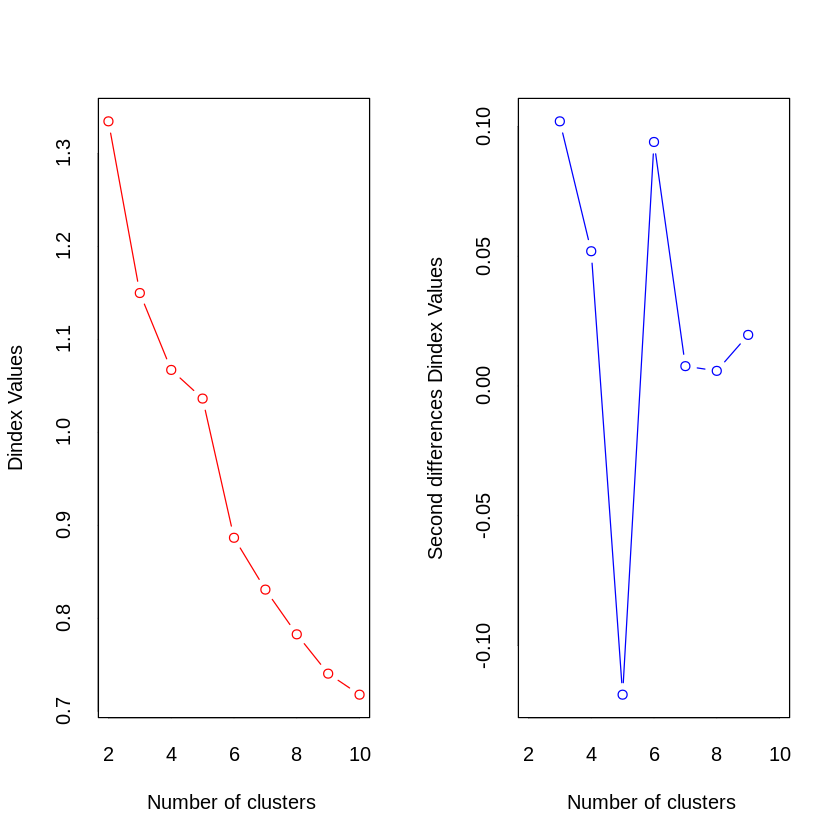

In [ ]:
nb <- NbClust(df, distance = "euclidean", min.nc = 2,
max.nc = 10, method = "kmeans")

In [ ]:
install.packages(c("factoextra", "fpc", "NbClust"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘modeltools’, ‘DEoptimR’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




# **Estadísticas para validación de clústeres**
**Validación interna del clúster**, utiliza la información interna del clúster para evaluar la bondad de una estructura de agrupamiento sin referencia
a información externa. También se puede utilizar para estimar el número de conglomerados y el algoritmo de agrupamiento apropiado sin ningún dato externo.


**Validación externa de clúster**, consiste en comparar los resultados de una
análisis de conglomerados a un resultado conocido externamente, por ejemplo, un conjunto de etiquetas proporcionadas externamente. Mide la medida en que las etiquetas de clúster coinciden con las suministradas externamente. Dado que conocemos el número de clúster "verdadero" de antemano, este enfoque
se utiliza principalmente para seleccionar el algoritmo de agrupamiento correcto para un conjunto de datos específico.

**Validación relativa del clúster**, que evalúa la estructura del clúster variando diferentes valores de parámetro para el mismo algoritmo (por ejemplo,: variando el número de clusters k). Generalmente se usa para determinar la cantidad óptima de clústeres.



## Validación interna del clústers

En esta sección, describimos los índices de validación de agrupamiento más utilizados. Recordar que el objetivo de particionar los algoritmos de agrupación en clústeres (Parte II) es dividir el conjunto de datos
en grupos de objetos, de modo que:

• los objetos en el mismo grupo son lo más similares posible,
• y los objetos en diferentes grupos son muy distintos

Es decir, queremos que la distancia promedio dentro del grupo sea lo más pequeña posible; y la distancia media entre los conglomerados debe ser lo más grande posible.

Las medidas de validación interna reflejan a menudo la compacidad, la conectividad y la separación de las particiones del clúster.


1. **Compacidad o cohesión del grupo**: mide qué tan cerca están los objetos dentro el mismo grupo. Una menor variación dentro del clúster es un indicador de una buena compacidad (es decir, una buena agrupación). Los diferentes índices para evaluar la compacidad de los clusters se basan en medidas de distancia como el cluster-sabio dentro distancias promedio/mediana entre observaciones.

Se calcula como el promedio de las distancia entre cada con el centro de cada closter al que pertenecen. 

2. **Separación:** mide qué tan bien separado está un grupo de otros grupos.
Los índices utilizados como medidas de separación incluyen:
- distancias entre los centros de los conglomerados
- las distancias mínimas por pares entre objetos en diferentes grupos

Se calcula como la distancia media ponderada entre los centros de los conglomerados

3. **Conectividad:** corresponde a la medida en que los elementos se colocan en el mismo cluster como sus vecinos más cercanos en el espacio de datos. La conectividad tiene un valor entre 0 e infinito y debe minimizarse.


**Coeficiente de Silhouette - Coeficiente del ancho de la silueta**

El análisis de silueta mide qué tan bien agrupada se encuentra una observación y estima la distancia promedio entre clusters. El gráfico de Silhouette muestra una medida de qué tan cerca está cada punto en un cluster con respecto a un conjunto de puntos vecinos. 


Para cada observación $i$, el ancho de la silueta se calcula de la siguiente manera:

1. Para cada observación $i$, calcular la disimilitud promedio $a_i$ entre $i$ y todos otros puntos que pertenezcan al clúster. 

2. Para todos los demás clusters $C$, a los que no pertenezca el punto $i$, calcular el promedio de la disimilitud $d (i, C)$ de $i$ a todas las observaciones de $C$. El más pequeño de estos $d(i, C)$ se define como $b_i = min_C d (i, C)$. El valor de $b_i$ puede verse como la diferencia entre $i$ y su clúster "vecino", es decir, el cluster más cerncano al que no pertenece. 

3. Finalmente, el ancho de la silueta de la observación $i$ se define mediante la fórmula:
$S_i = (b_i ≠ a_i) / max (a_i, b_i)$.

El ancho de la silueta se puede interpretar de la siguiente manera:

 * $S_i$ cercano a 1 está bien clusterizada.
 * $S_i$ cercano a 0 significa que la observación se encuentra entre dos clusters. 
 * $S_i$ negativo probablemente está posicionada en un cluster erróneo. 

## Índice de Dunn 

Es también un estadístico de validación interna que se puede calcular de la siguiente manera,

1. Para cada cluster, calcular la distancia entre cada punto dentro del cluster y los objetos de los demás clusters

2. Utilice el mínimo de esta distancia por pares como la separación entre grupos (separación mínima)

3. Para cada grupo, calcule la distancia entre los objetos del mismo grupo.

4. Utilice la distancia máxima intra-grupo (es decir, el diámetro máximo) como el intra-grupo compacidad.

5. Calcule el índice de Dunn (D) de la siguiente manera:


$D=\frac{min.separation}{max.diameter}$

Se espera que en un cluster "Bien separado" el diámetro de los clusters sea pequeño y la distancia entre los clusters sea grande, con lo cual, entre mayor sea el índice de Dunn mejor definidos estarán los clusters. 





# Medidas externas para validación de clusters

El objetivo es comparar los conglomerados identificados (por k-medias, PAM o agrupamiento jerárquico) a una referencia externa.

Es posible cuantificar la concordancia entre los clústeres de partición y los referencia utilizando el **índice de Rand corregido** y el **índice de variación VI de Meila**, que se implementan en la función R cluster.stats (). 



**Índice de Rand corregido (ARI) - Adjusted Rand Index**
El índice Rand es la precisión de predecir si dos objetos $a, b$ están en el mismo grupo o en grupos diferentes.

$ R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$

El índice de Rand corregido varía de 0 (sin coincidencia) a 1 (coincidencia perfecta).

****índice de variación VI de Meil

***********************************************************************

### **Ejecución** 

In [ ]:
library(factoextra)
library(fpc)
library(NbClust)

## **Se retoma la base de datos IRIS**

In [ ]:
# Excluding the column "Species" at position 5
df <- iris[, -5]
head(df, n = 3)

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 5.1          3.5         1.4          0.2        
2 4.9          3.0         1.4          0.2        
3 4.7          3.2         1.3          0.2

## **eclust**
Proporciona una solución para mejorar el flujo de trabajo de los análisis de agrupación en clústeres y la elegante visualización de datos basada en ggplot2.

https://www.rdocumentation.org/packages/factoextra/versions/1.0.7/topics/eclust

## **Se genera un cluster particional con base en k-means**

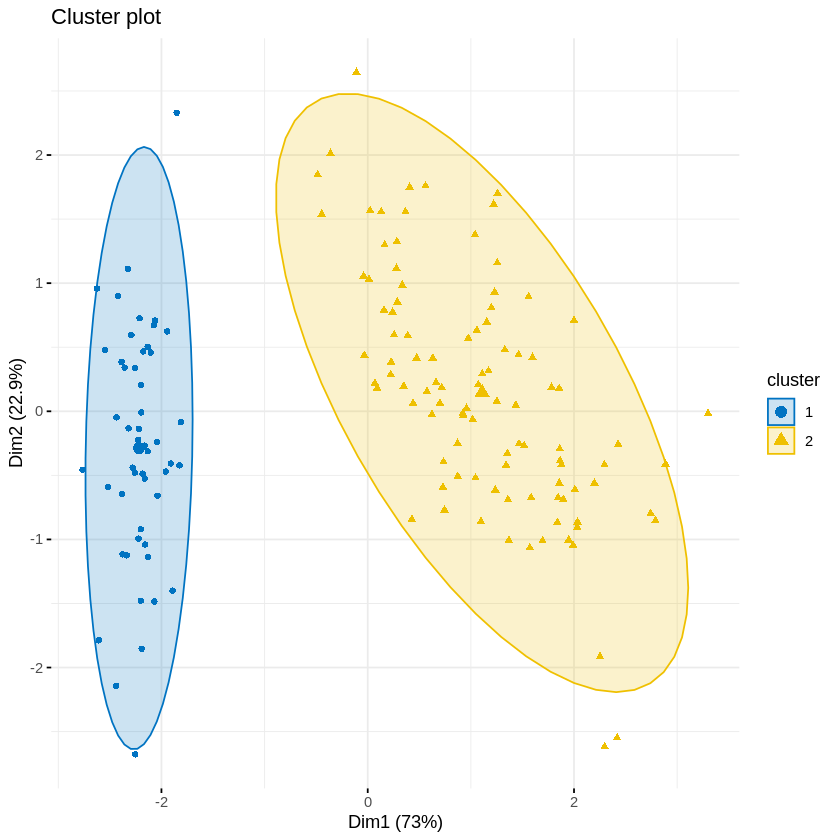

In [ ]:
km.res <- eclust(df, "kmeans", k = 2, nstart = 25, graph = FALSE)
# Visualize k-means clusters

fviz_cluster(km.res, geom = "point", ellipse.type = "norm",
palette = "jco", ggtheme = theme_minimal())

## **Se genera un cluster jerárquico con base en la métrica euclidiana**

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


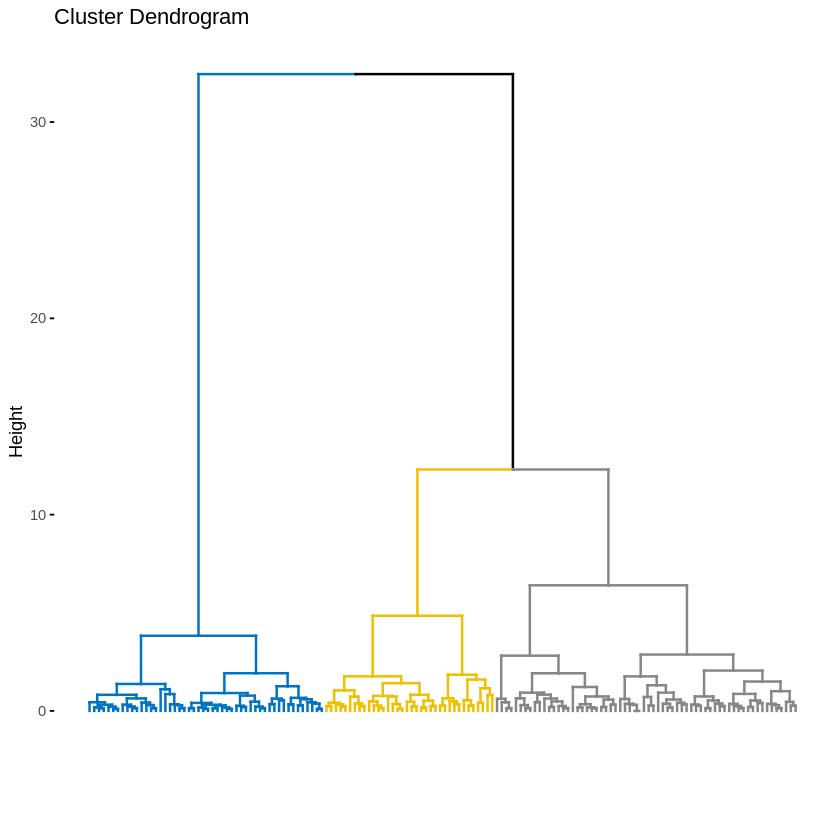

In [ ]:
# Hierarchical clustering
hc.res <- eclust(df, "hclust", k = 3, hc_metric = "euclidean", hc_method = "ward.D2", graph = FALSE)
# Visualize dendrograms
fviz_dend(hc.res, show_labels = FALSE,
palette = "jco", as.ggplot = TRUE)

## **Análisis de Silueta**

El análisis de silueta mide qué tan bien agrupada se encuentra una observación y estima la distancia promedio entre clusters. El gráfico de Silhouette muestra una medida de qué tan cerca está cada punto en un cluster con respecto a un conjunto de puntos vecinos. 

Recuerde que el coeficiente de silhouette $(Si)$ mide qué tan similar es un objeto $i$ con respecto a otros objetos de su propio clúster frente a los del clúster vecino. 

• Un valor de $S_i$ cercano a 1 indica que el objeto está bien agrupado. En otras palabras, el objeto $i$ es similar a los demás objetos de su grupo.

• Un valor de $S_i$ cercano a -1 indica que el objeto está mal agrupado y que la asignación a otro grupo probablemente mejoraría los resultados generales.

### **El resultado que se obtiene es el promedio**

  cluster size ave.sil.width
1       1   50          0.80
2       2   62          0.42
3       3   38          0.45


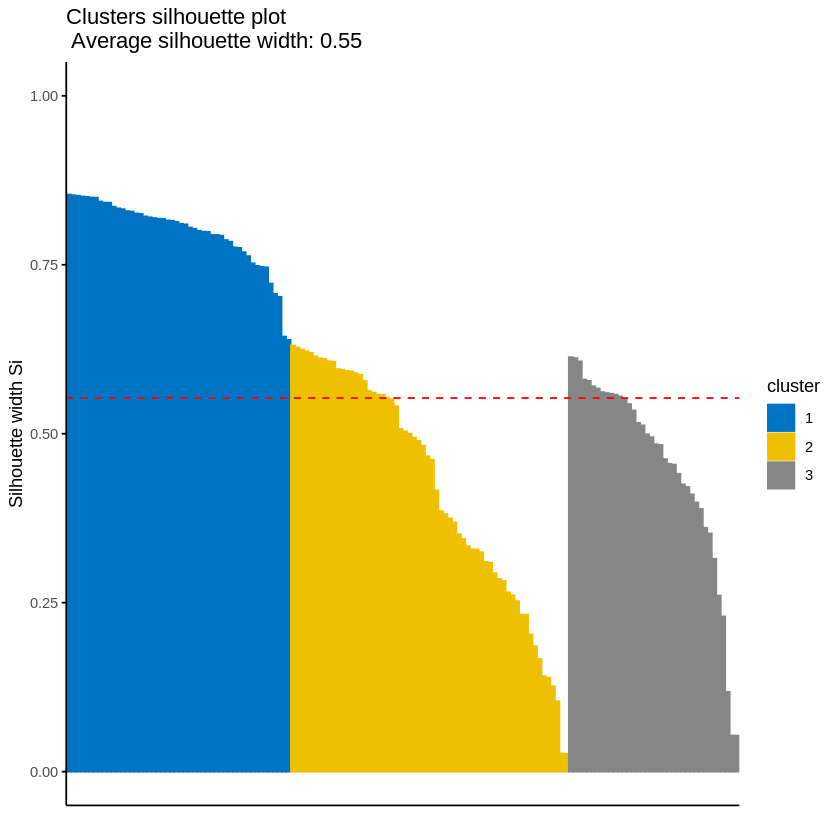

In [ ]:
fviz_silhouette(km.res, palette = "jco", ggtheme = theme_classic())

El cluster  1 es el mejor agrupado en el cluster particional de k-medias. 

  cluster size ave.sil.width
1       1   50          0.80
2       2   64          0.41
3       3   36          0.47


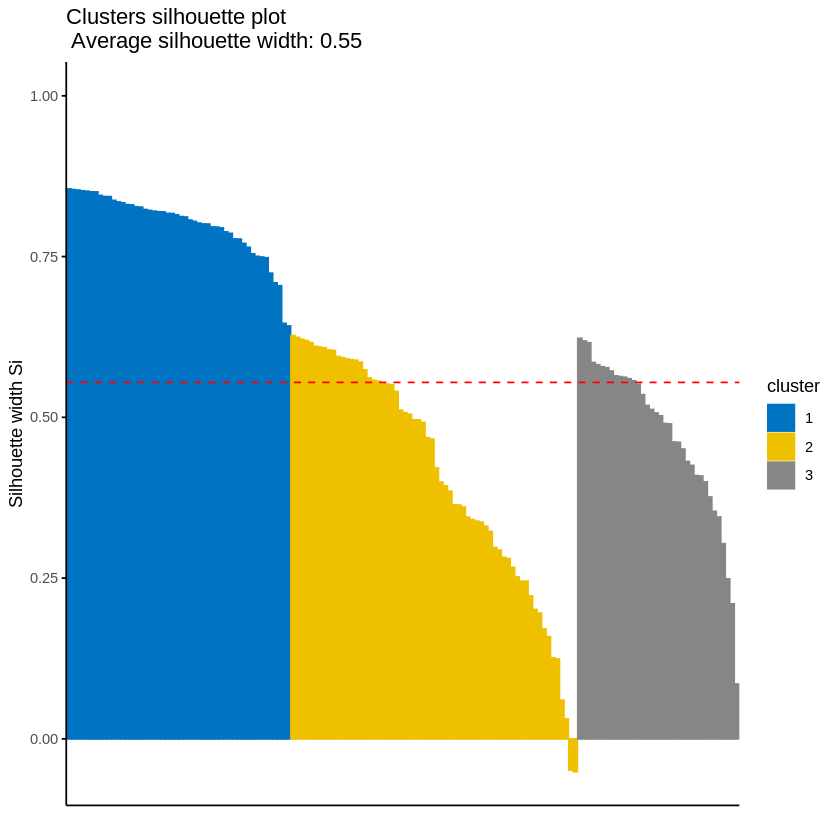

In [ ]:
fviz_silhouette(hc.res, palette = "jco", ggtheme = theme_classic())

El cluster  1 es el mejor agrupado en el cluster jerárquico. 

Ahora analizamos el coeficiente de Silueta uno por uno. 

In [ ]:
#fviz_silhouette(hc.res, palette = "jco", ggtheme = theme_classic())
# Silhouette information
silinfo <- km.res$silinfo
names(silinfo)
# Silhouette widths of each observation
head(silinfo$widths[, 1:3], 10)

[1] "widths"          "clus.avg.widths" "avg.width"

cluster neighbor sil_width
8  1       2        0.8539051
1  1       2        0.8529551
50 1       2        0.8520984
18 1       2        0.8510183
40 1       2        0.8503323
41 1       2        0.8494158
5  1       2        0.8493016
29 1       2        0.8436443
28 1       2        0.8420177
38 1       2        0.8418895

In [ ]:
# Average silhouette width of each cluster
silinfo$clus.avg.widths

[1] 0.7981405 0.4173199 0.4511051

In [ ]:
# The total average (mean of all individual silhouette widths)
silinfo$avg.width

[1] 0.552819

In [ ]:
# The size of each clusters
km.res$size

[1] 50 62 38

## **Buscando valores negativos** 

In [ ]:
# Silhouette width of observation
sil <- km.res$silinfo$widths[, 1:3]
# Objects with negative silhouette
neg_sil_index <- which(sil[, "sil_width"] < 0)
sil[neg_sil_index, , drop = FALSE]

cluster neighbor sil_width

## **Índice de Dunn**

In [ ]:
library(fpc)
# Statistics for k-means clustering
km_stats <- cluster.stats(dist(df), km.res$cluster)
# Dun index
km_stats$dunn

[1] 0.09880739

## Estadísticos externos de validación de Clusters

In [ ]:
table(iris$Species, km.res$cluster)

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

In [ ]:
library("fpc")
# Compute cluster stats
species <- as.numeric(iris$Species)
clust_stats <- cluster.stats(d = dist(df),
species, km.res$cluster)
# Corrected Rand index
clust_stats$corrected.rand

[1] 0.7302383

##**Selección del mejor modelo de clustering**

In [ ]:
install.packages("clValid")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(clValid)
# Iris data set:
# - Remove Species column and scale
df <- scale(iris[, -5])

Loading required package: cluster



In [ ]:
# Compute clValid
clmethods <- c("hierarchical","kmeans","pam")
intern <- clValid(df, nClust = 2:6, clMethods = clmethods, validation = "internal")
# Summary
summary(intern)

Warning message in clValid(df, nClust = 2:6, clMethods = clmethods, validation = "internal"):
“rownames for data not specified, using 1:nrow(data)”



Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 2 3 4 5 6 

Validation Measures:
                                 2       3       4       5       6
                                                                  
hierarchical Connectivity   0.9762  5.5964  7.5492 18.0508 24.7306
             Dunn           0.2674  0.1874  0.2060  0.0700  0.0762
             Silhouette     0.5818  0.4803  0.4067  0.3746  0.3248
kmeans       Connectivity   0.9762 23.8151 25.9044 40.3060 40.1385
             Dunn           0.2674  0.0265  0.0700  0.0808  0.0808
             Silhouette     0.5818  0.4599  0.4189  0.3455  0.3441
pam          Connectivity   0.9762 23.0726 31.8067 35.7964 44.5413
             Dunn           0.2674  0.0571  0.0566  0.0642  0.0361
             Silhouette     0.5818  0.4566  0.4091  0.3574  0.3400

Optimal Scores:

             Score  Method       Clusters
Connectivity 0.9762 hierarchical 2       
Dunn         0.2674 hierarchical 2       
Silhouette   0.5818 hi

### **Medidas de estabilidad**

• The average proportion of non-overlap (APN)

• The average distance (AD)

• The average distance between means (ADM)

• The figure of merit (FOM)

In [ ]:
# Stability measures
clmethods <- c("hierarchical","kmeans","pam")
stab <- clValid(df, nClust = 2:6, clMethods = clmethods,
validation = "stability")
# Display only optimal Scores
optimalScores(stab)

Warning message in clValid(df, nClust = 2:6, clMethods = clmethods, validation = "stability"):
“rownames for data not specified, using 1:nrow(data)”


Score       Method       Clusters
APN 0.003266667 hierarchical 2       
AD  1.004288856 pam          6       
ADM 0.016087089 hierarchical 2       
FOM 0.455750052 pam          6